## Assignment 2.1

# Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse

$\mathbf{Exercise\, 1.}$ Illustrate with a meaningful example the bias variance decomposition, as we have seen it during lesson, for the non linear Support Vector Regression model, for increasing vaues of the regularization parameter _C_ (for example C = 1e-3, 1e-2, 1e-1, 1, 1e2, $\ldots$).


In [3]:
## sklearn call for Support Vector Regression with C = parameter_value
parameter_value = 1e-2
poly = SVR(kernel='rbf', C = parameter_value)

list_C=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3,1e+4,1e+5,1e+6,1e+7,1e+8]

Initialize some variable

In [4]:
x_min = -4
x_max=4.5
N_samples = 20

Create the function to sample the data when  𝑓(𝑥)=𝑠𝑖𝑛(𝑥) (I took the same function as in the lab lesson 3)

In [5]:
def f(x):
    return (np.sin(1*x))

def sample_data_batch(x_min,x_max,N_samples):
    ## The x-data is fixed (no variability here)
    X = np.linspace(x_min,x_max,N_samples)
    noise_level = 0.5
    noise = noise_level * np.random.randn(N_samples)
    ## The variability here depends only from the noise we add on the samples
    return [X,f(X) + noise]

Sample the data

In [6]:
X = np.linspace(x_min,x_max,N_samples)

Here, I adapted the code from lesson 3 in order to have SVR instead of PolynomialFeature

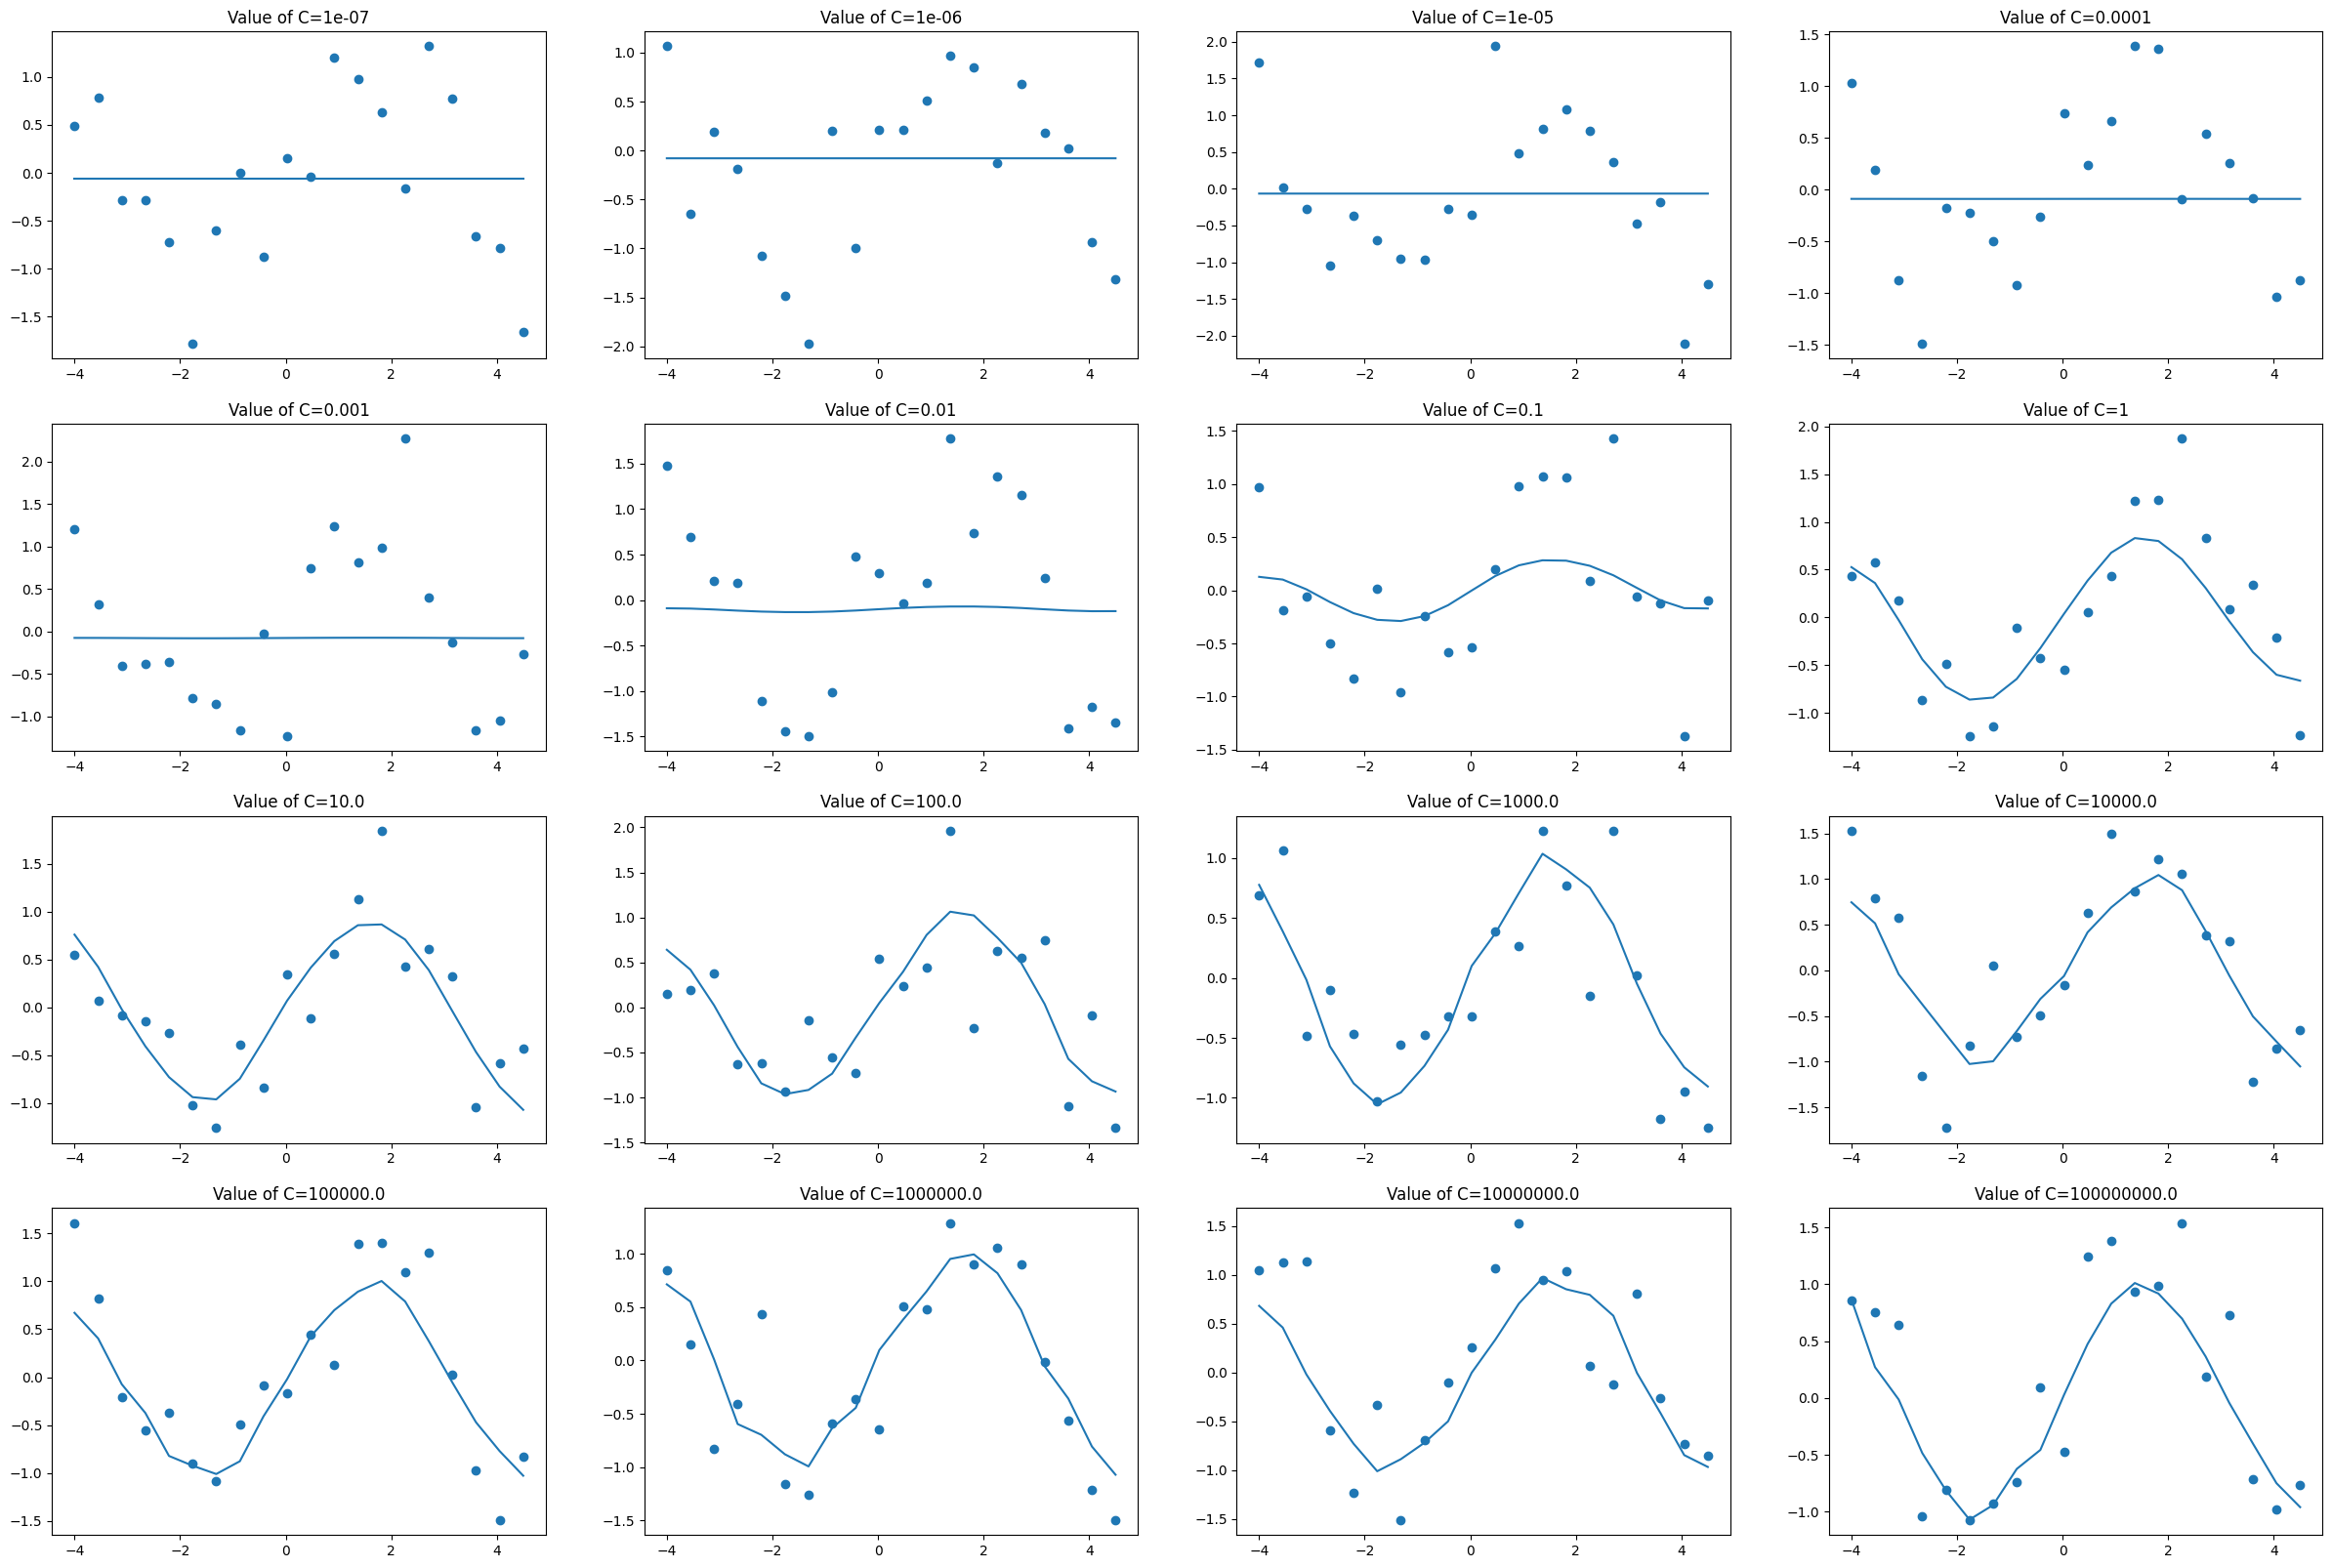

In [7]:
#create the figure
plt.figure(figsize=(30,20))
sub=0
for parameter_value in list_C:
    sub+=1
    #creating a subplot
    plt.subplot(4,4,sub)
    #Plotting a sample data batch
    plt.scatter(X,sample_data_batch(x_min,x_max,N_samples)[1])
    poly = SVR(kernel='rbf', C = parameter_value)
    prediction_on_data_sample = []
    
    for i in range(50):
        ## Sampling a new data batch
        current_data = sample_data_batch(x_min,x_max, N_samples)
        ## Model training        
        svr = SVR(kernel='rbf', C=parameter_value, gamma='auto', epsilon=0.1) #I used those parameter in order to have faster execution
        svr.fit(current_data[0].reshape(-1,1), current_data[1])
        ## saving the prediction (and eventually plotting the results)
        prediction_on_data_train = svr.predict(X.reshape(-1,1))
        prediction_on_data_sample.append(prediction_on_data_train)
        
    ## We compute E_D(y_hat) (and eventually plot the result)
    expect_pred = np.mean(prediction_on_data_sample, axis=0)
    plt.plot(X, expect_pred, label='prediction')
    title="Value of C="+str(parameter_value)
    plt.title(title)

    
    ## We compute Var_D(y_hat)
    ## We first compute several samples for (y_hat - E(y_hat))**2
    variance = []
    for i in range(50):
        ## Sampling a new data batch
        current_data = sample_data_batch(x_min,x_max, N_samples)
        ## Model training        
        svr = SVR(kernel='rbf', C=parameter_value, gamma='auto', epsilon=0.1)
        svr.fit(current_data[0].reshape(-1,1), current_data[1])
        ## Compute the variance term as (prediction - E_D(y_hat))
        prediction_on_data_train = svr.predict(X.reshape(-1,1))
        variance.append((prediction_on_data_train - expect_pred)**2)

## We compute the variance E[(y_hat - E(y_hat))**2]
variance = np.mean(variance, axis=0)

## We integrate bias and variance along the x-axis
bias = np.mean((f(X) - expect_pred)**2)
var = np.mean(variance)


In [8]:
print("final bias =",bias)
print("final variance =",var)

final bias = 0.003897031934502398
final variance = 0.21806409385550607


$\mathbf{Exercise\, 2.}$ Modify the example of Exercise 1 to show the effect of increasing noise values on the bias and on the variance.

Here, I took the same code we did in the first exercise and put it inside a function in order to be able to modify the noise at my convenience after getting rid of all the plots element we had in the code.

In [9]:

def ex1(noise_level):
    def f(x):
        return (np.sin(1*x))

    def sample_data_batch(x_min,x_max,N_samples):
        ## The x-data is fixed (no variability here)
        X = np.linspace(x_min,x_max,N_samples)
        noise = noise_level * np.random.randn(N_samples)
        ## The variability here depends only from the noise we add on the samples
        return [X,f(X) + noise]
    #create the figure
    #plt.figure(figsize=(30,20))
    sub=0
    for parameter_value in list_C:
        sub+=1
        #creating a subplot
#         plt.subplot(4,4,sub)
#         #Plotting a sample data batch
#         plt.scatter(X,sample_data_batch(x_min,x_max,N_samples)[1])
        poly = SVR(kernel='rbf', C = parameter_value)
        prediction_on_data_sample = []

        for i in range(50):
            ## Sampling a new data batch
            current_data = sample_data_batch(x_min,x_max, N_samples)
            ## Model training        
            svr = SVR(kernel='rbf', C=parameter_value, gamma='auto', epsilon=0.1)
            svr.fit(current_data[0].reshape(-1,1), current_data[1])
            ## saving the prediction (and eventually plotting the results)
            prediction_on_data_train = svr.predict(X.reshape(-1,1))
            prediction_on_data_sample.append(prediction_on_data_train)

        ## We compute E_D(y_hat) (and eventually plot the result)
        expect_pred = np.mean(prediction_on_data_sample, axis=0)
#         plt.plot(X, expect_pred, label='prediction')
#         title="Value of C="+str(parameter_value)
#         plt.title(title)


        ## We compute Var_D(y_hat)
        ## We first compute several samples for (y_hat - E(y_hat))**2
        variance = []
        for i in range(50):
            ## Sampling a new data batch
            current_data = sample_data_batch(x_min,x_max, N_samples)
            ## Model training        
            svr = SVR(kernel='rbf', C=parameter_value, gamma='auto', epsilon=0.1)
            svr.fit(current_data[0].reshape(-1,1), current_data[1])
            ## Compute the variance term as (prediction - E_D(y_hat))
            prediction_on_data_train = svr.predict(X.reshape(-1,1))
            variance.append((prediction_on_data_train - expect_pred)**2)

    ## We compute the variance E[(y_hat - E(y_hat))**2]
    variance = np.mean(variance, axis=0)

    ## We integrate bias and variance along the x-axis
    bias = np.mean((f(X) - expect_pred)**2)
    var = np.mean(variance)
    return bias,var

[0.23616843110681582, 0.22910852929169975, 0.23197662507573463, 0.2373298619995481, 0.23558127362262898, 0.22806368720037837, 0.222023527537529, 0.2369079971941553, 0.23174043120086513, 0.23972286051569683, 0.2200157777863546]
[0.002661021399791036, 0.005735474479190518, 0.004224358415796516, 0.009217974408081687, 0.00405429319717334, 0.005896530571795155, 0.0037544233255322147, 0.0030531122652438978, 0.0030008088071987555, 0.0046840571224324905, 0.003876488149313792]


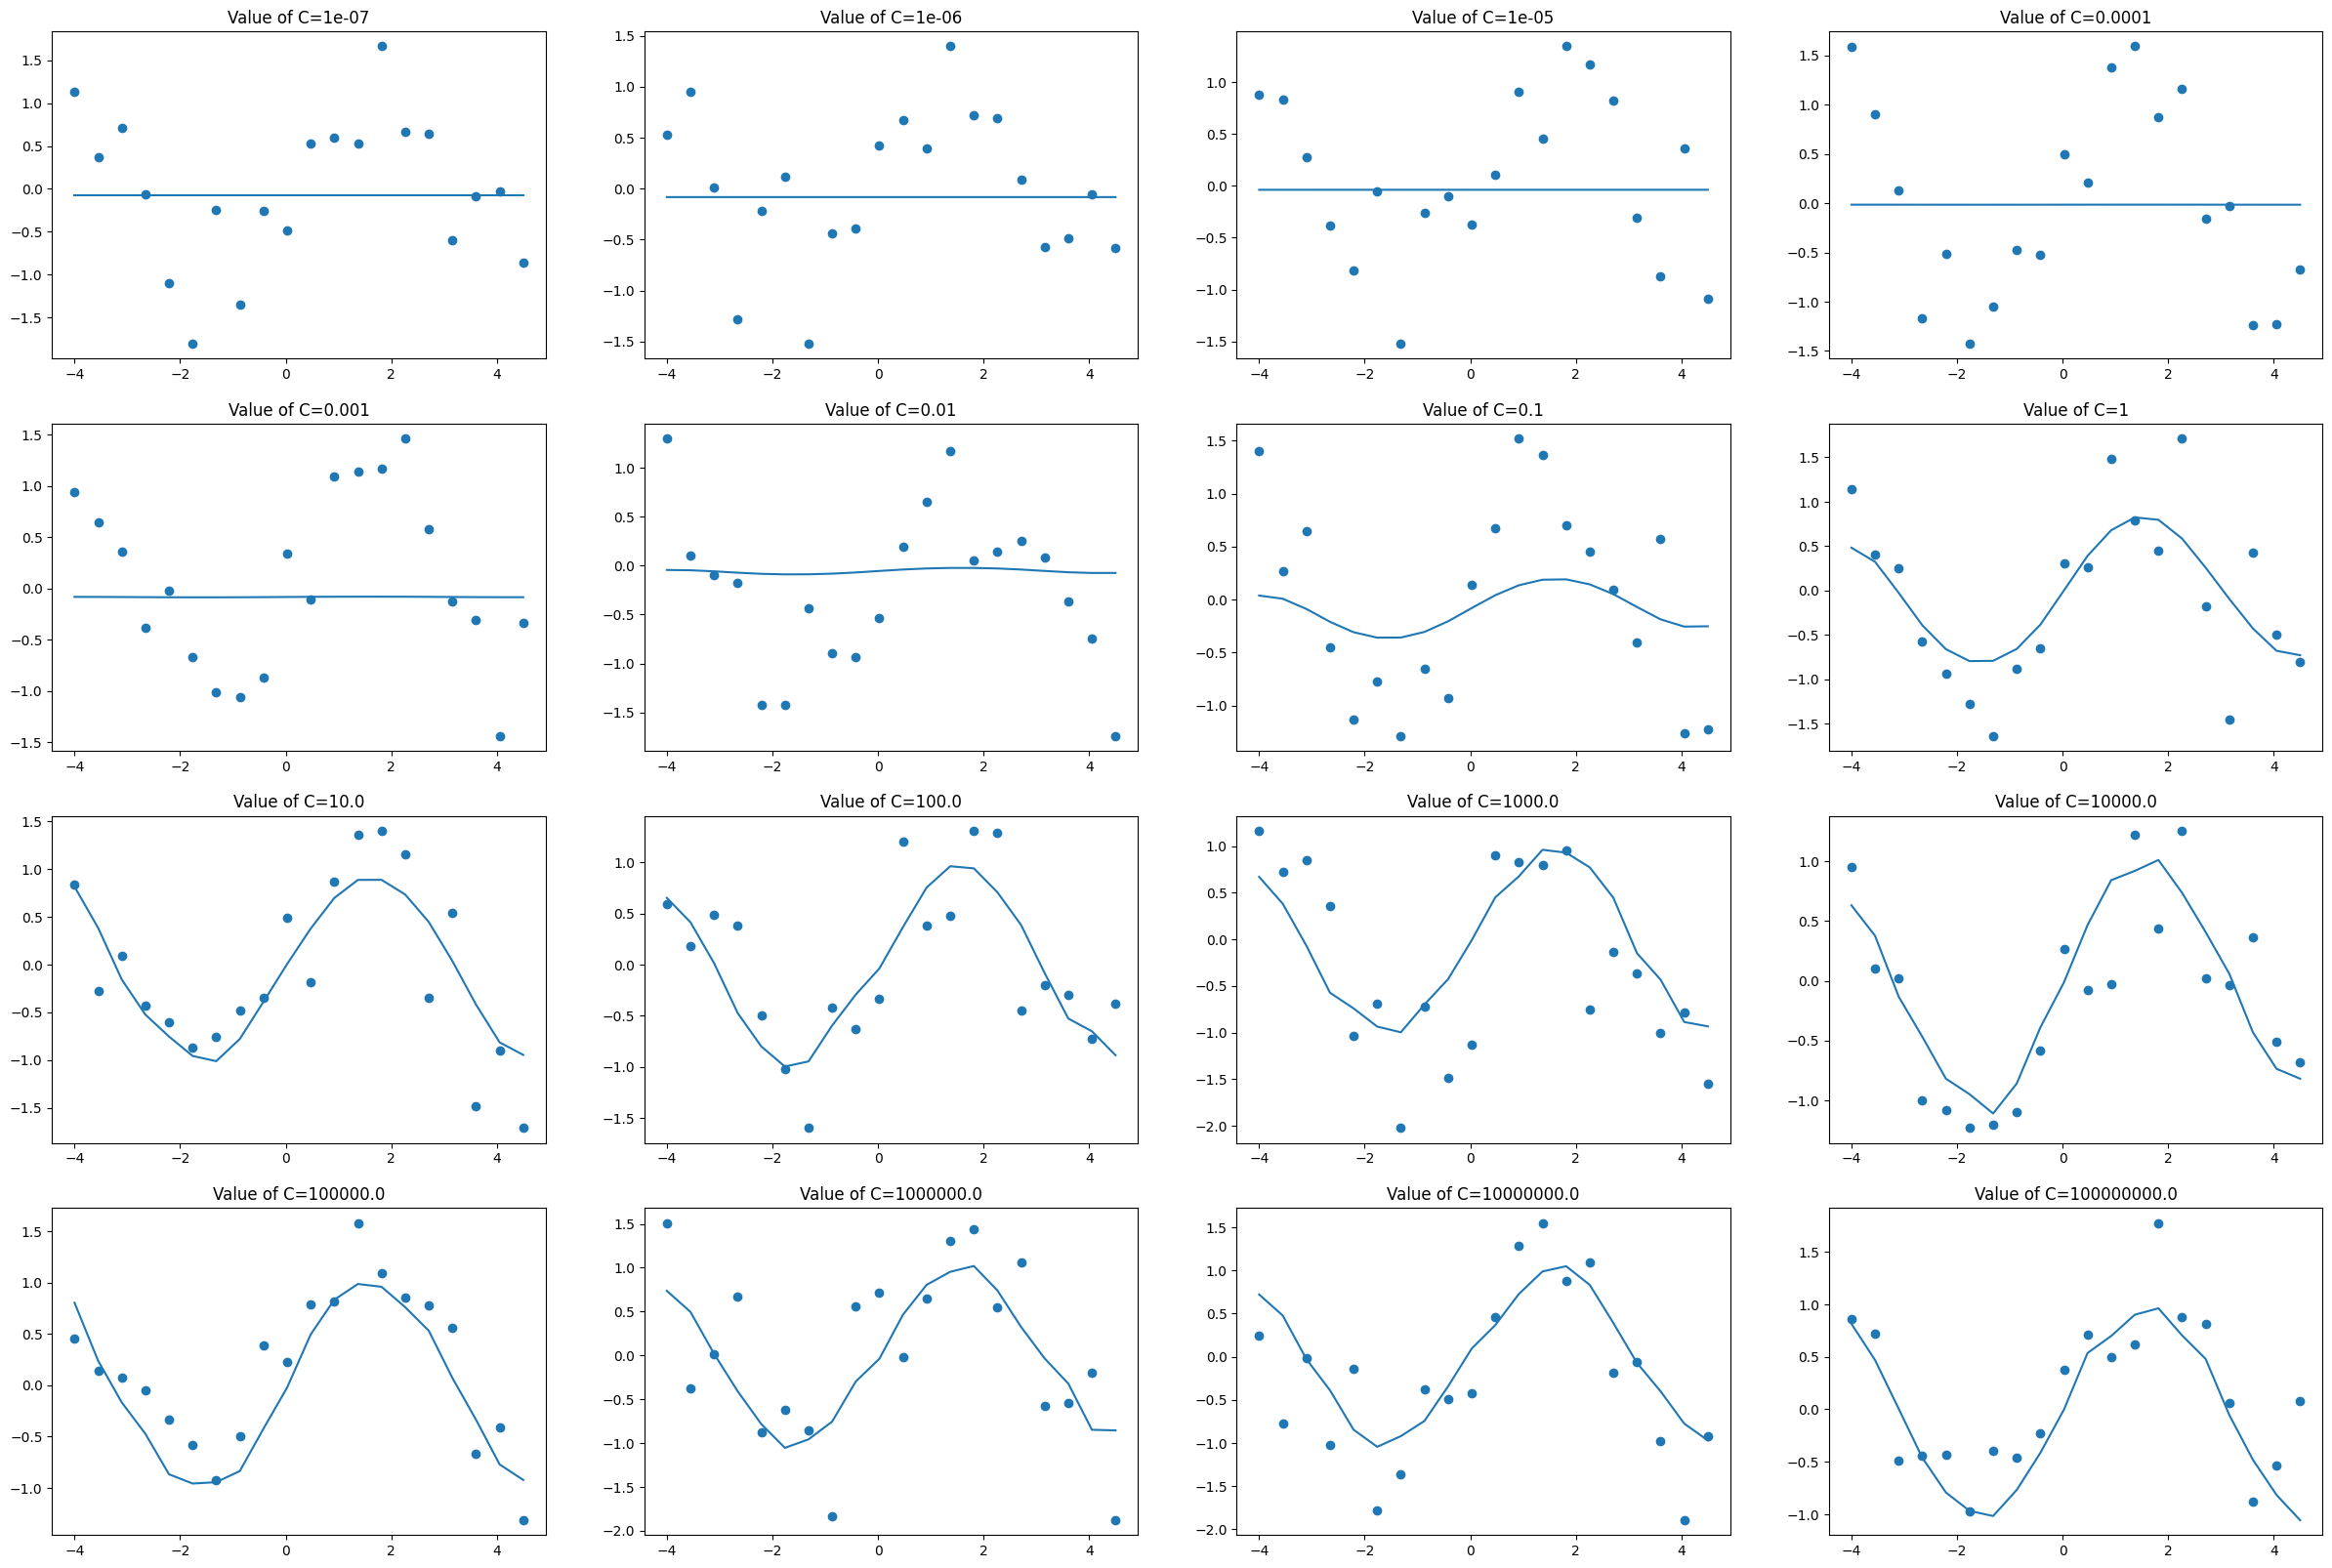

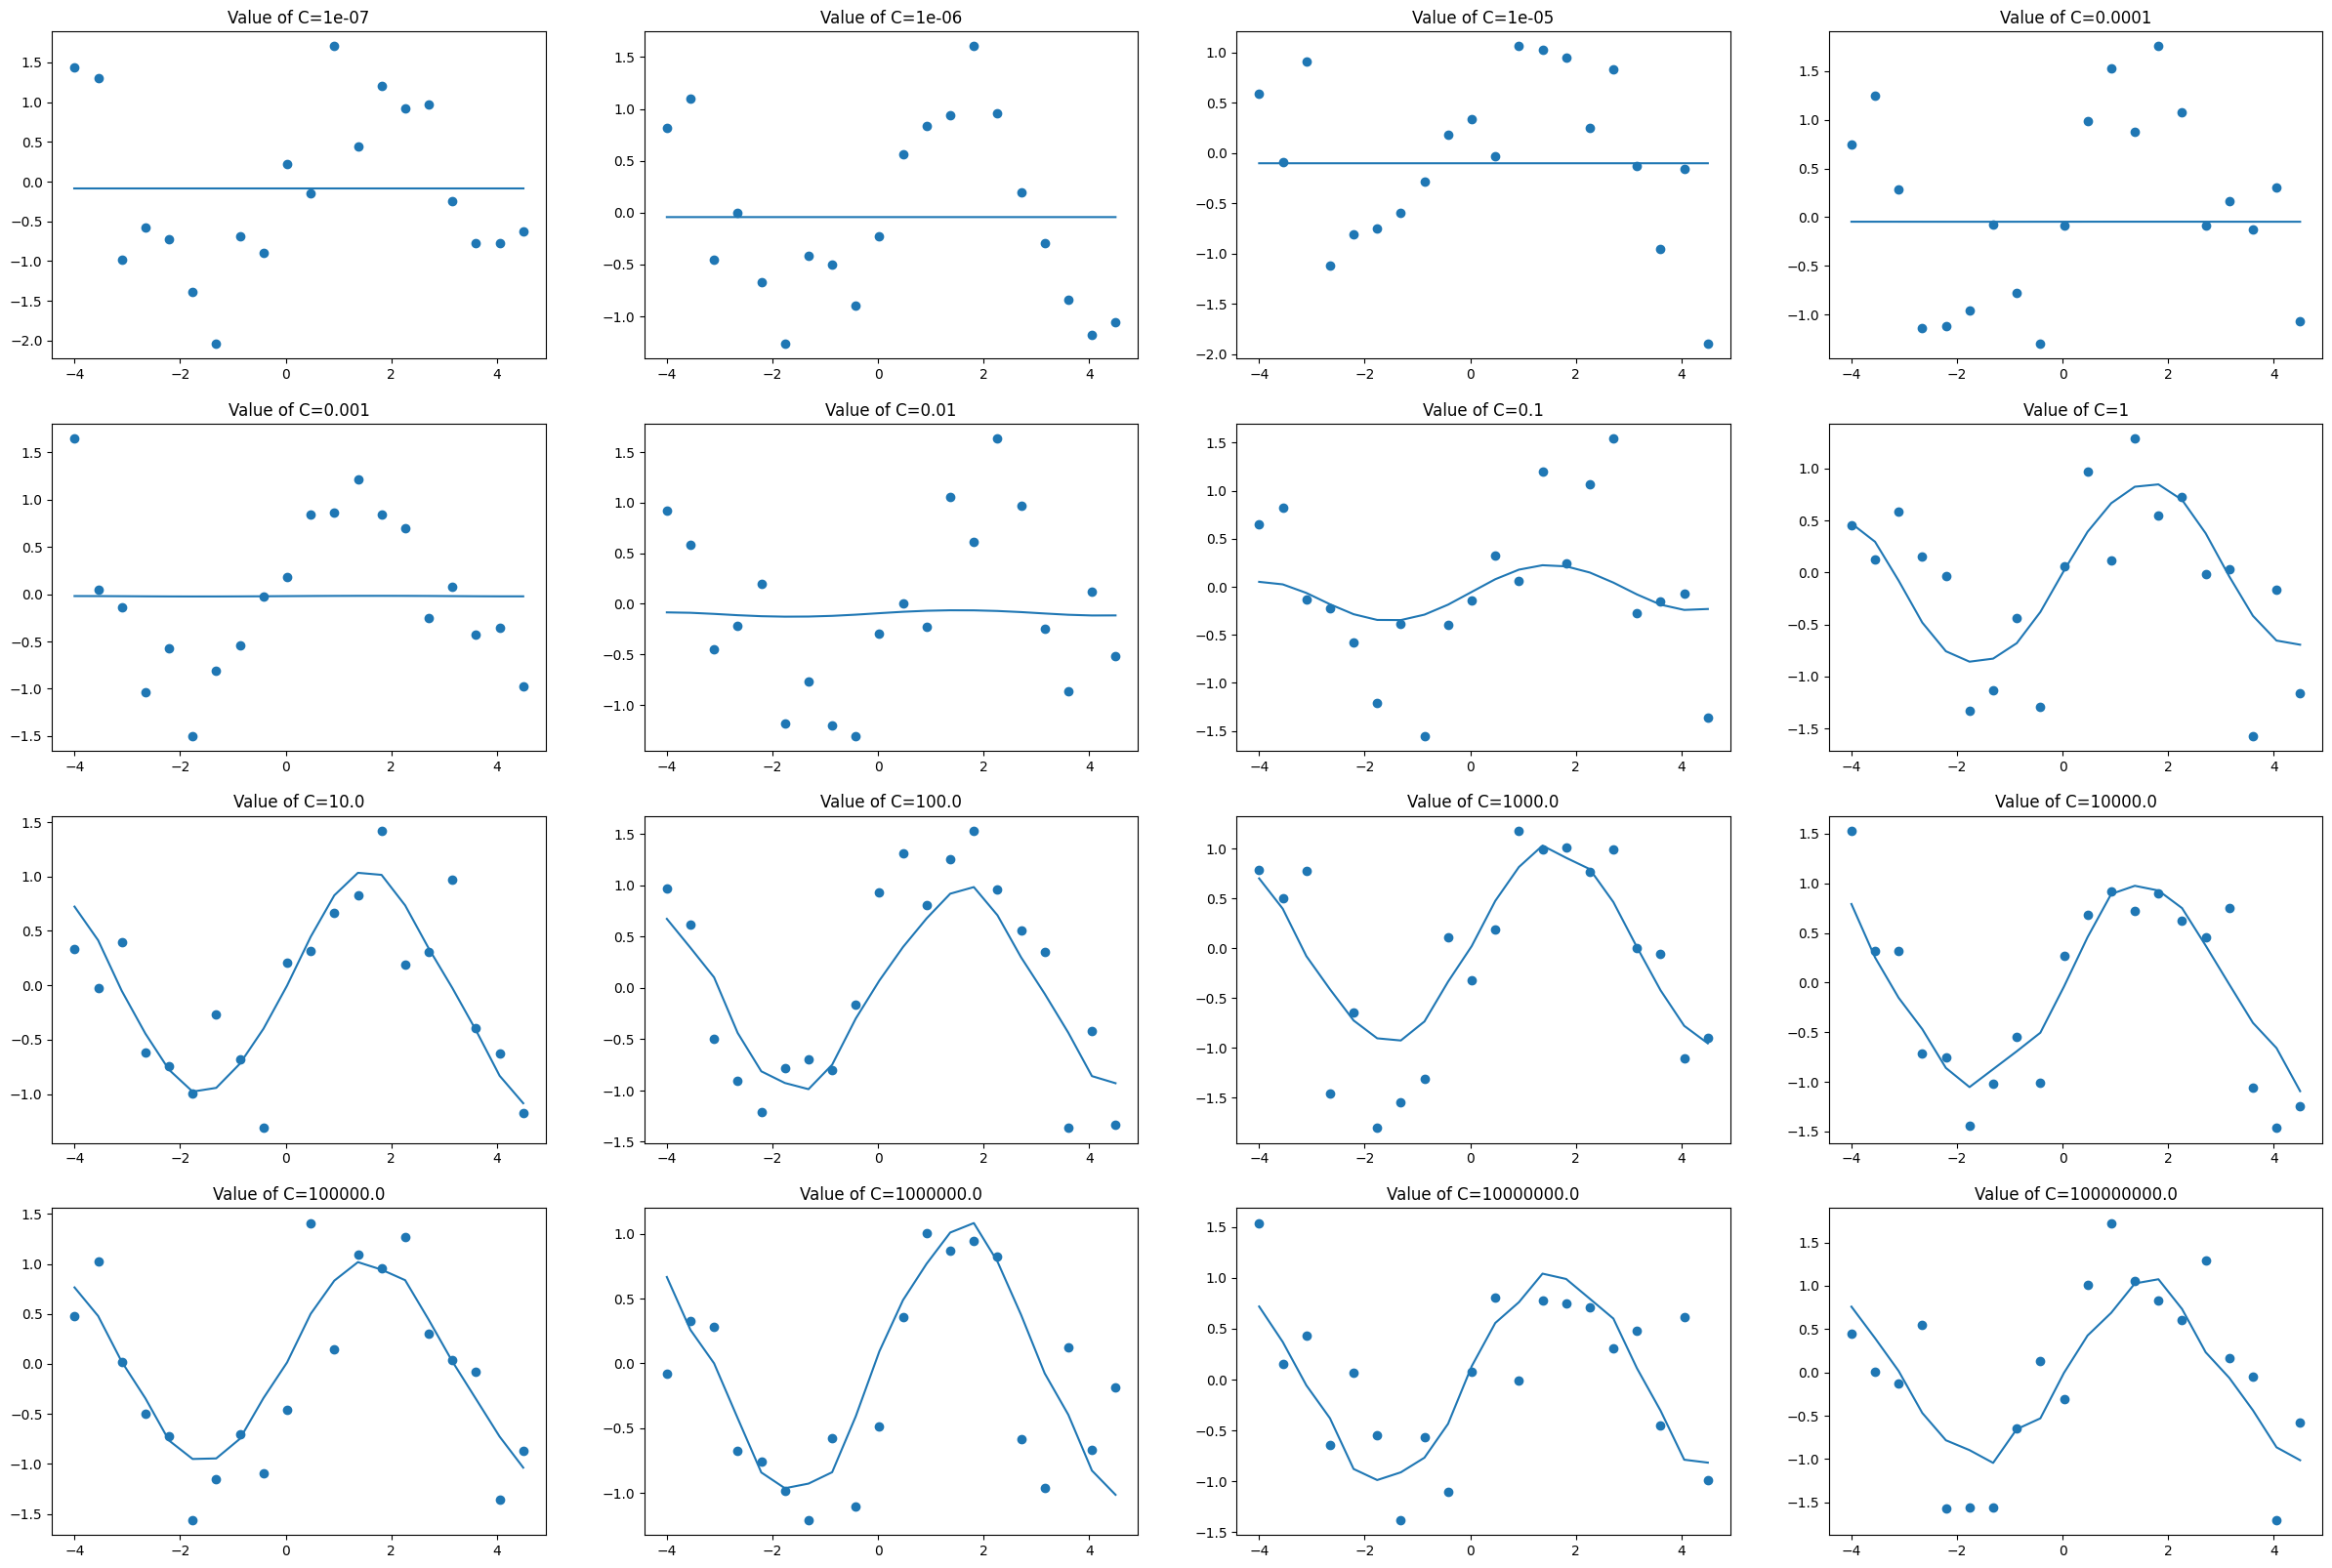

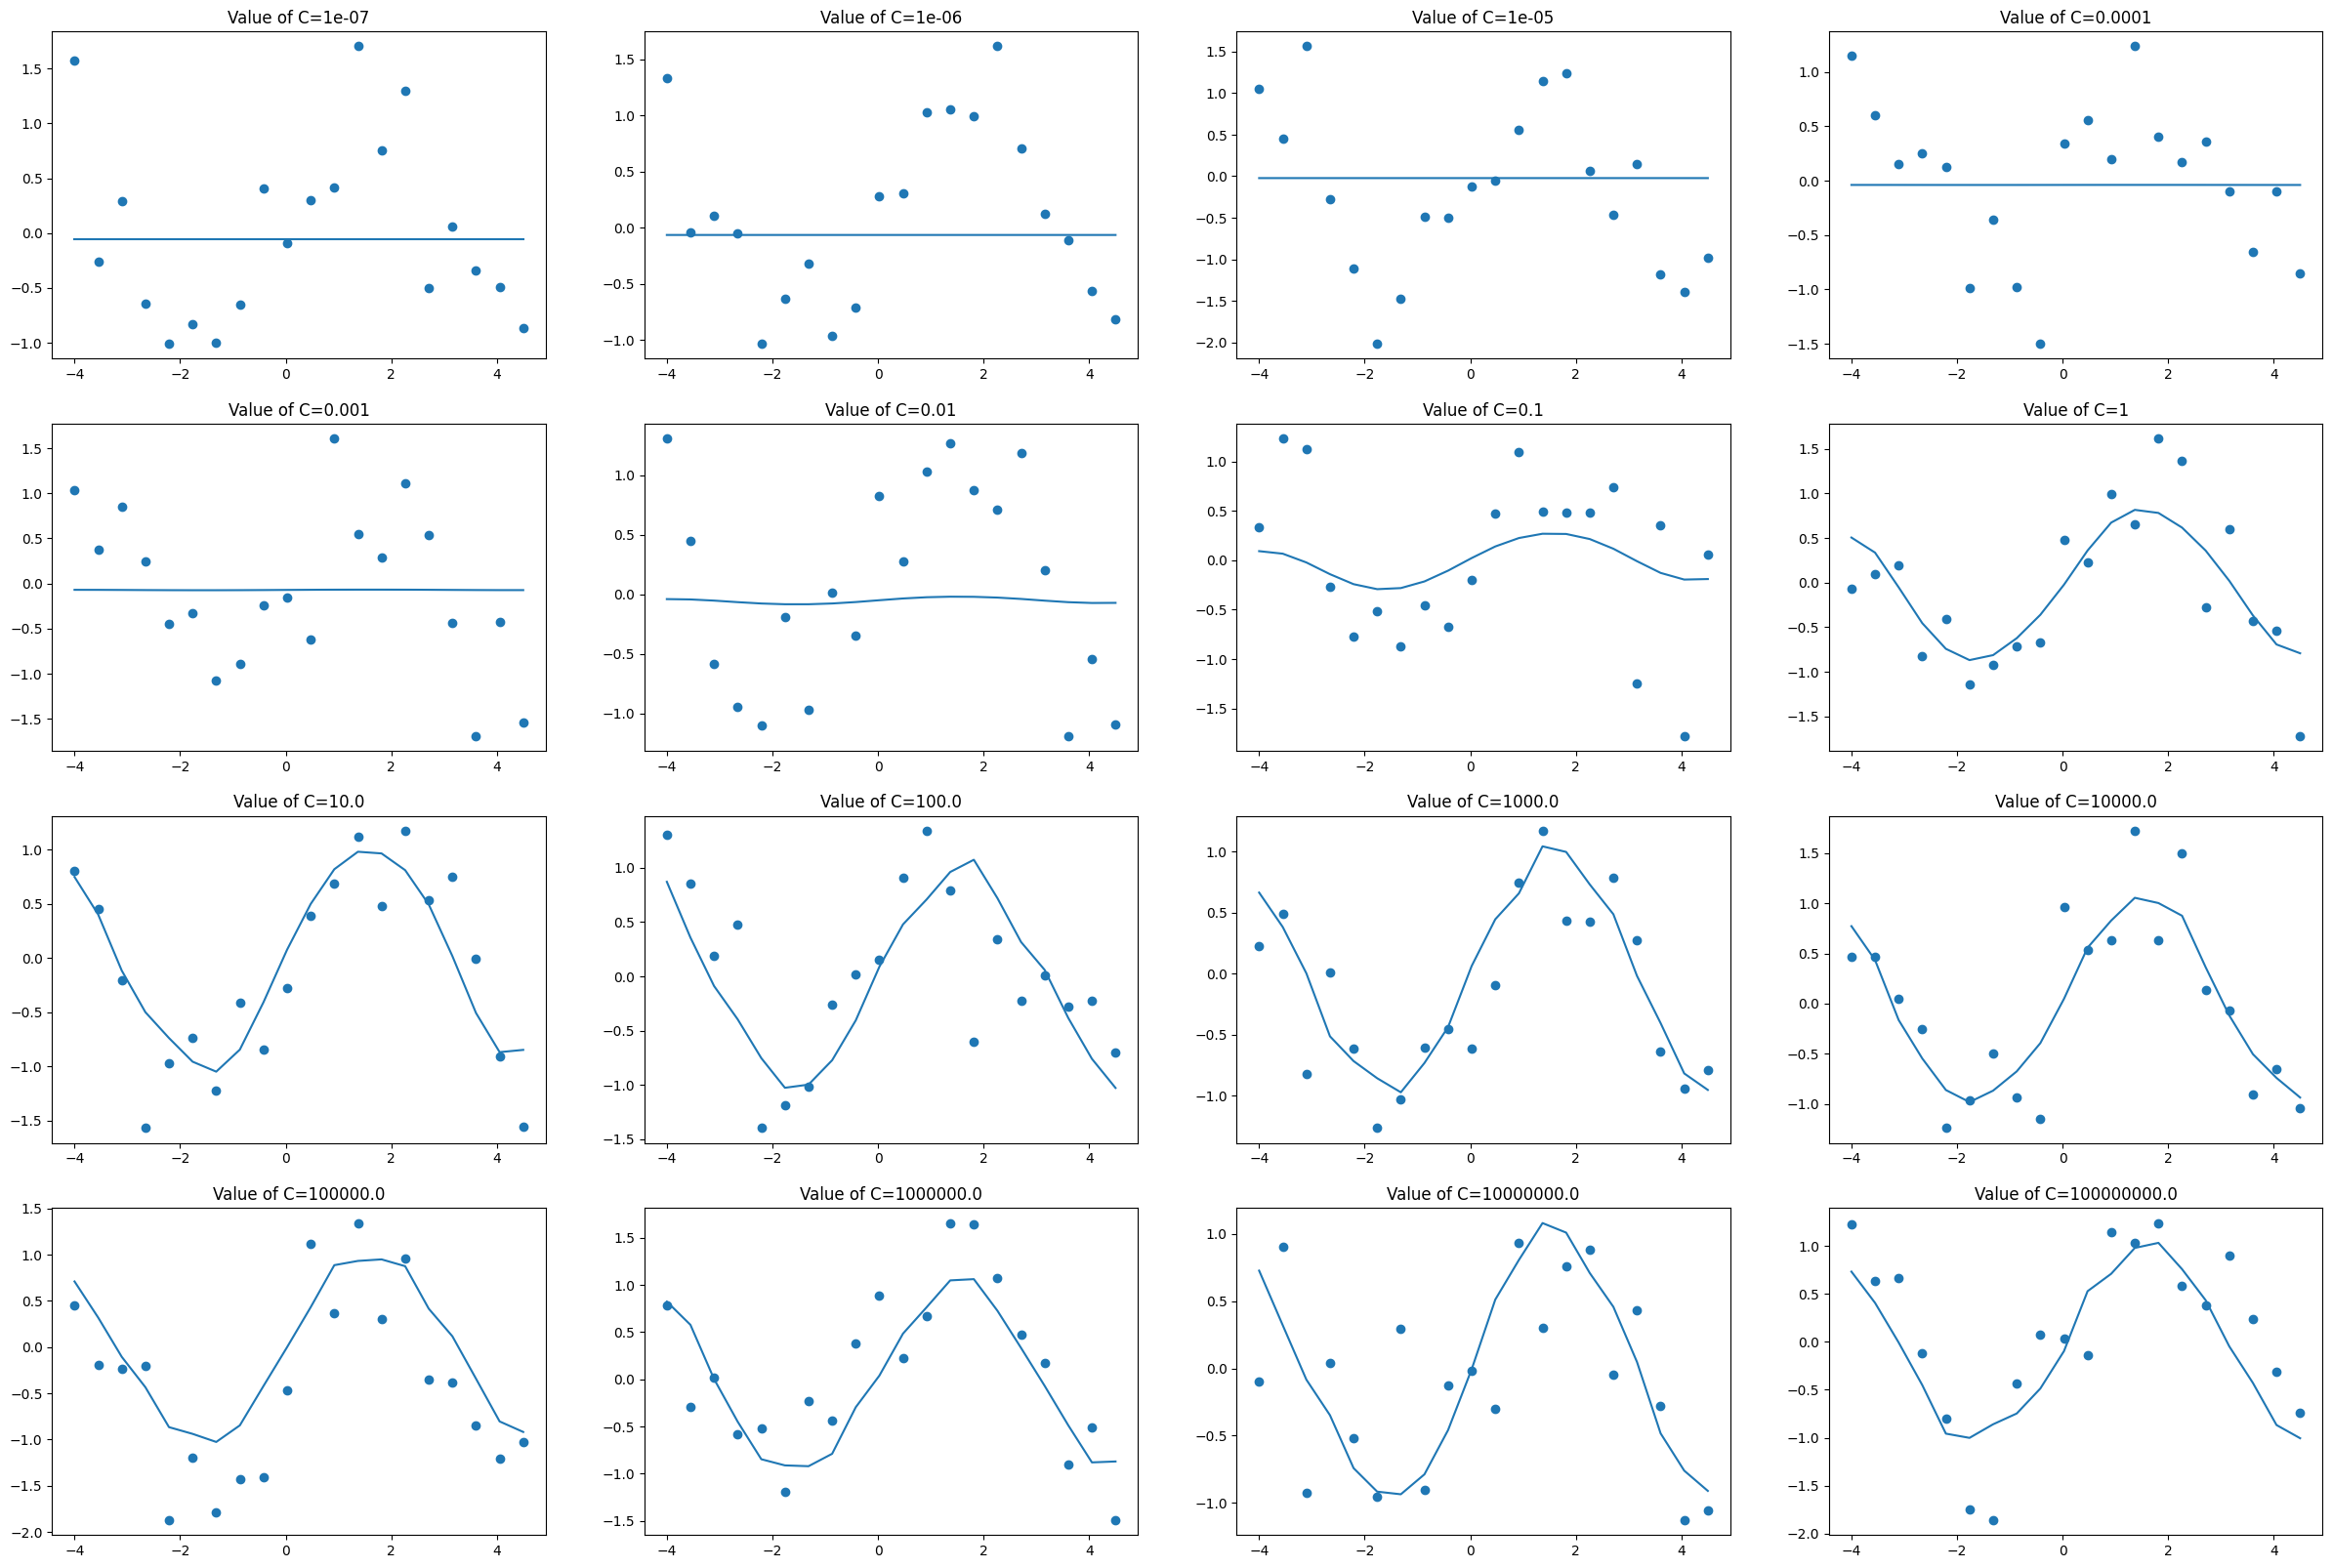

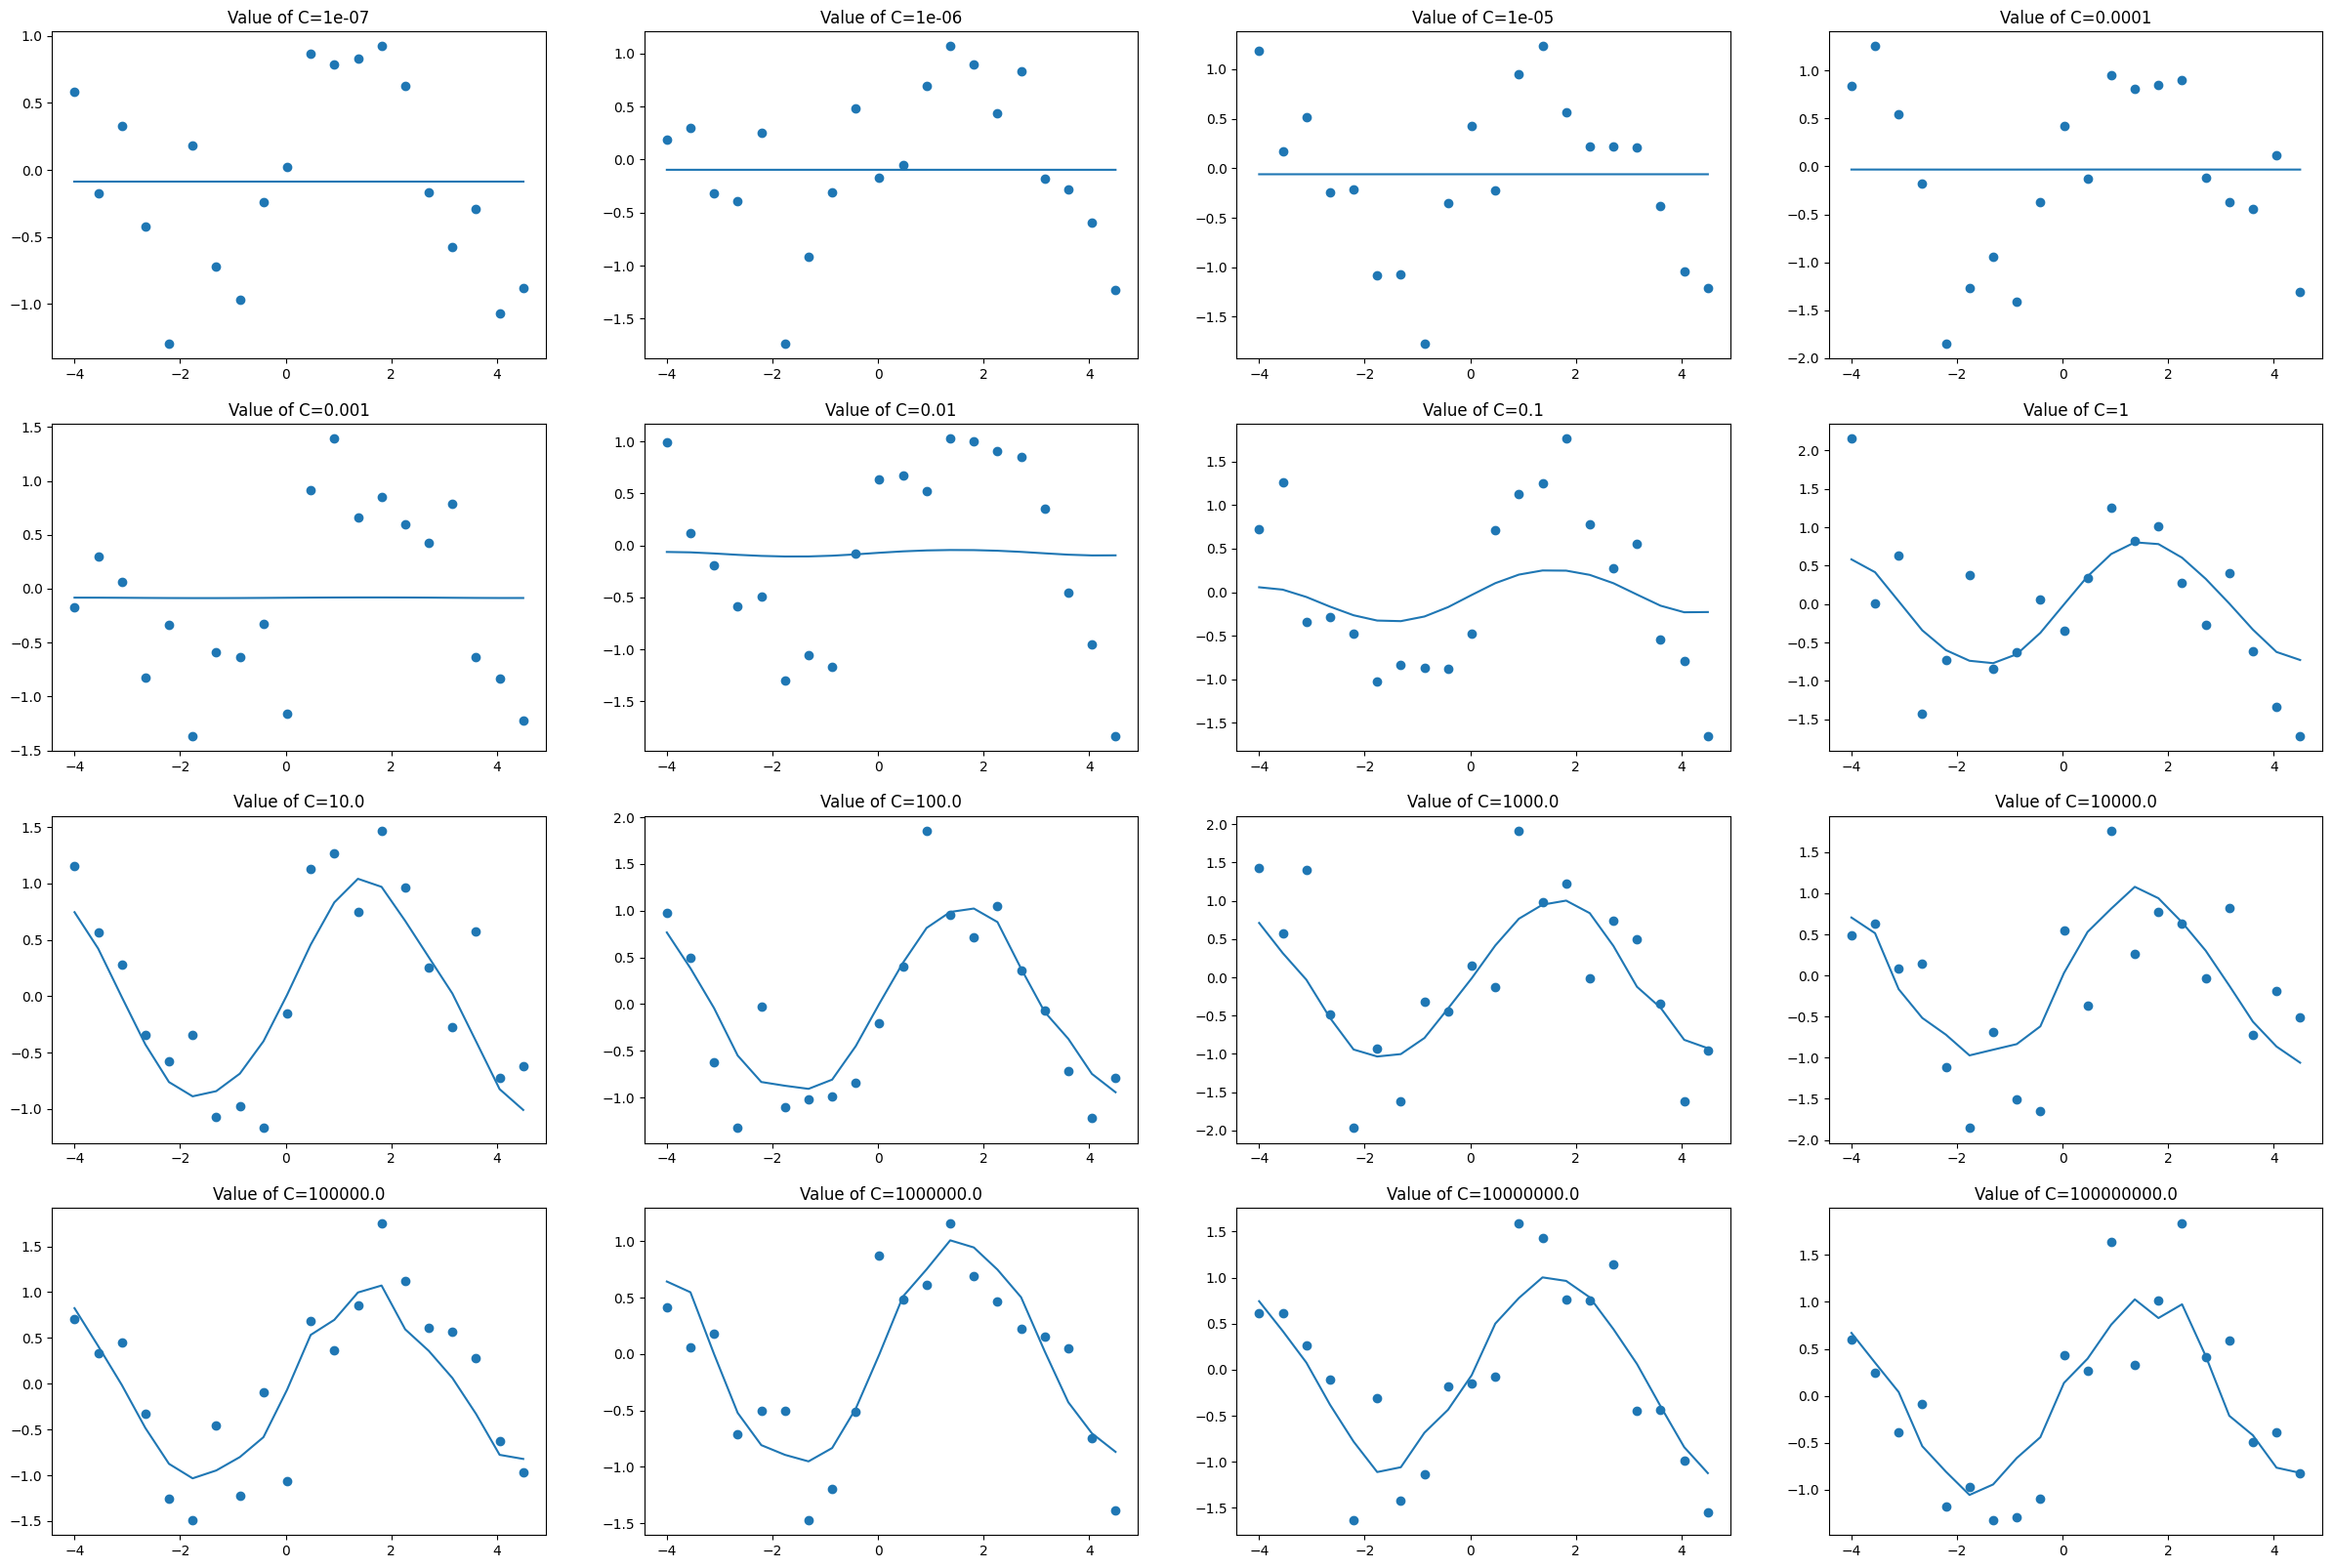

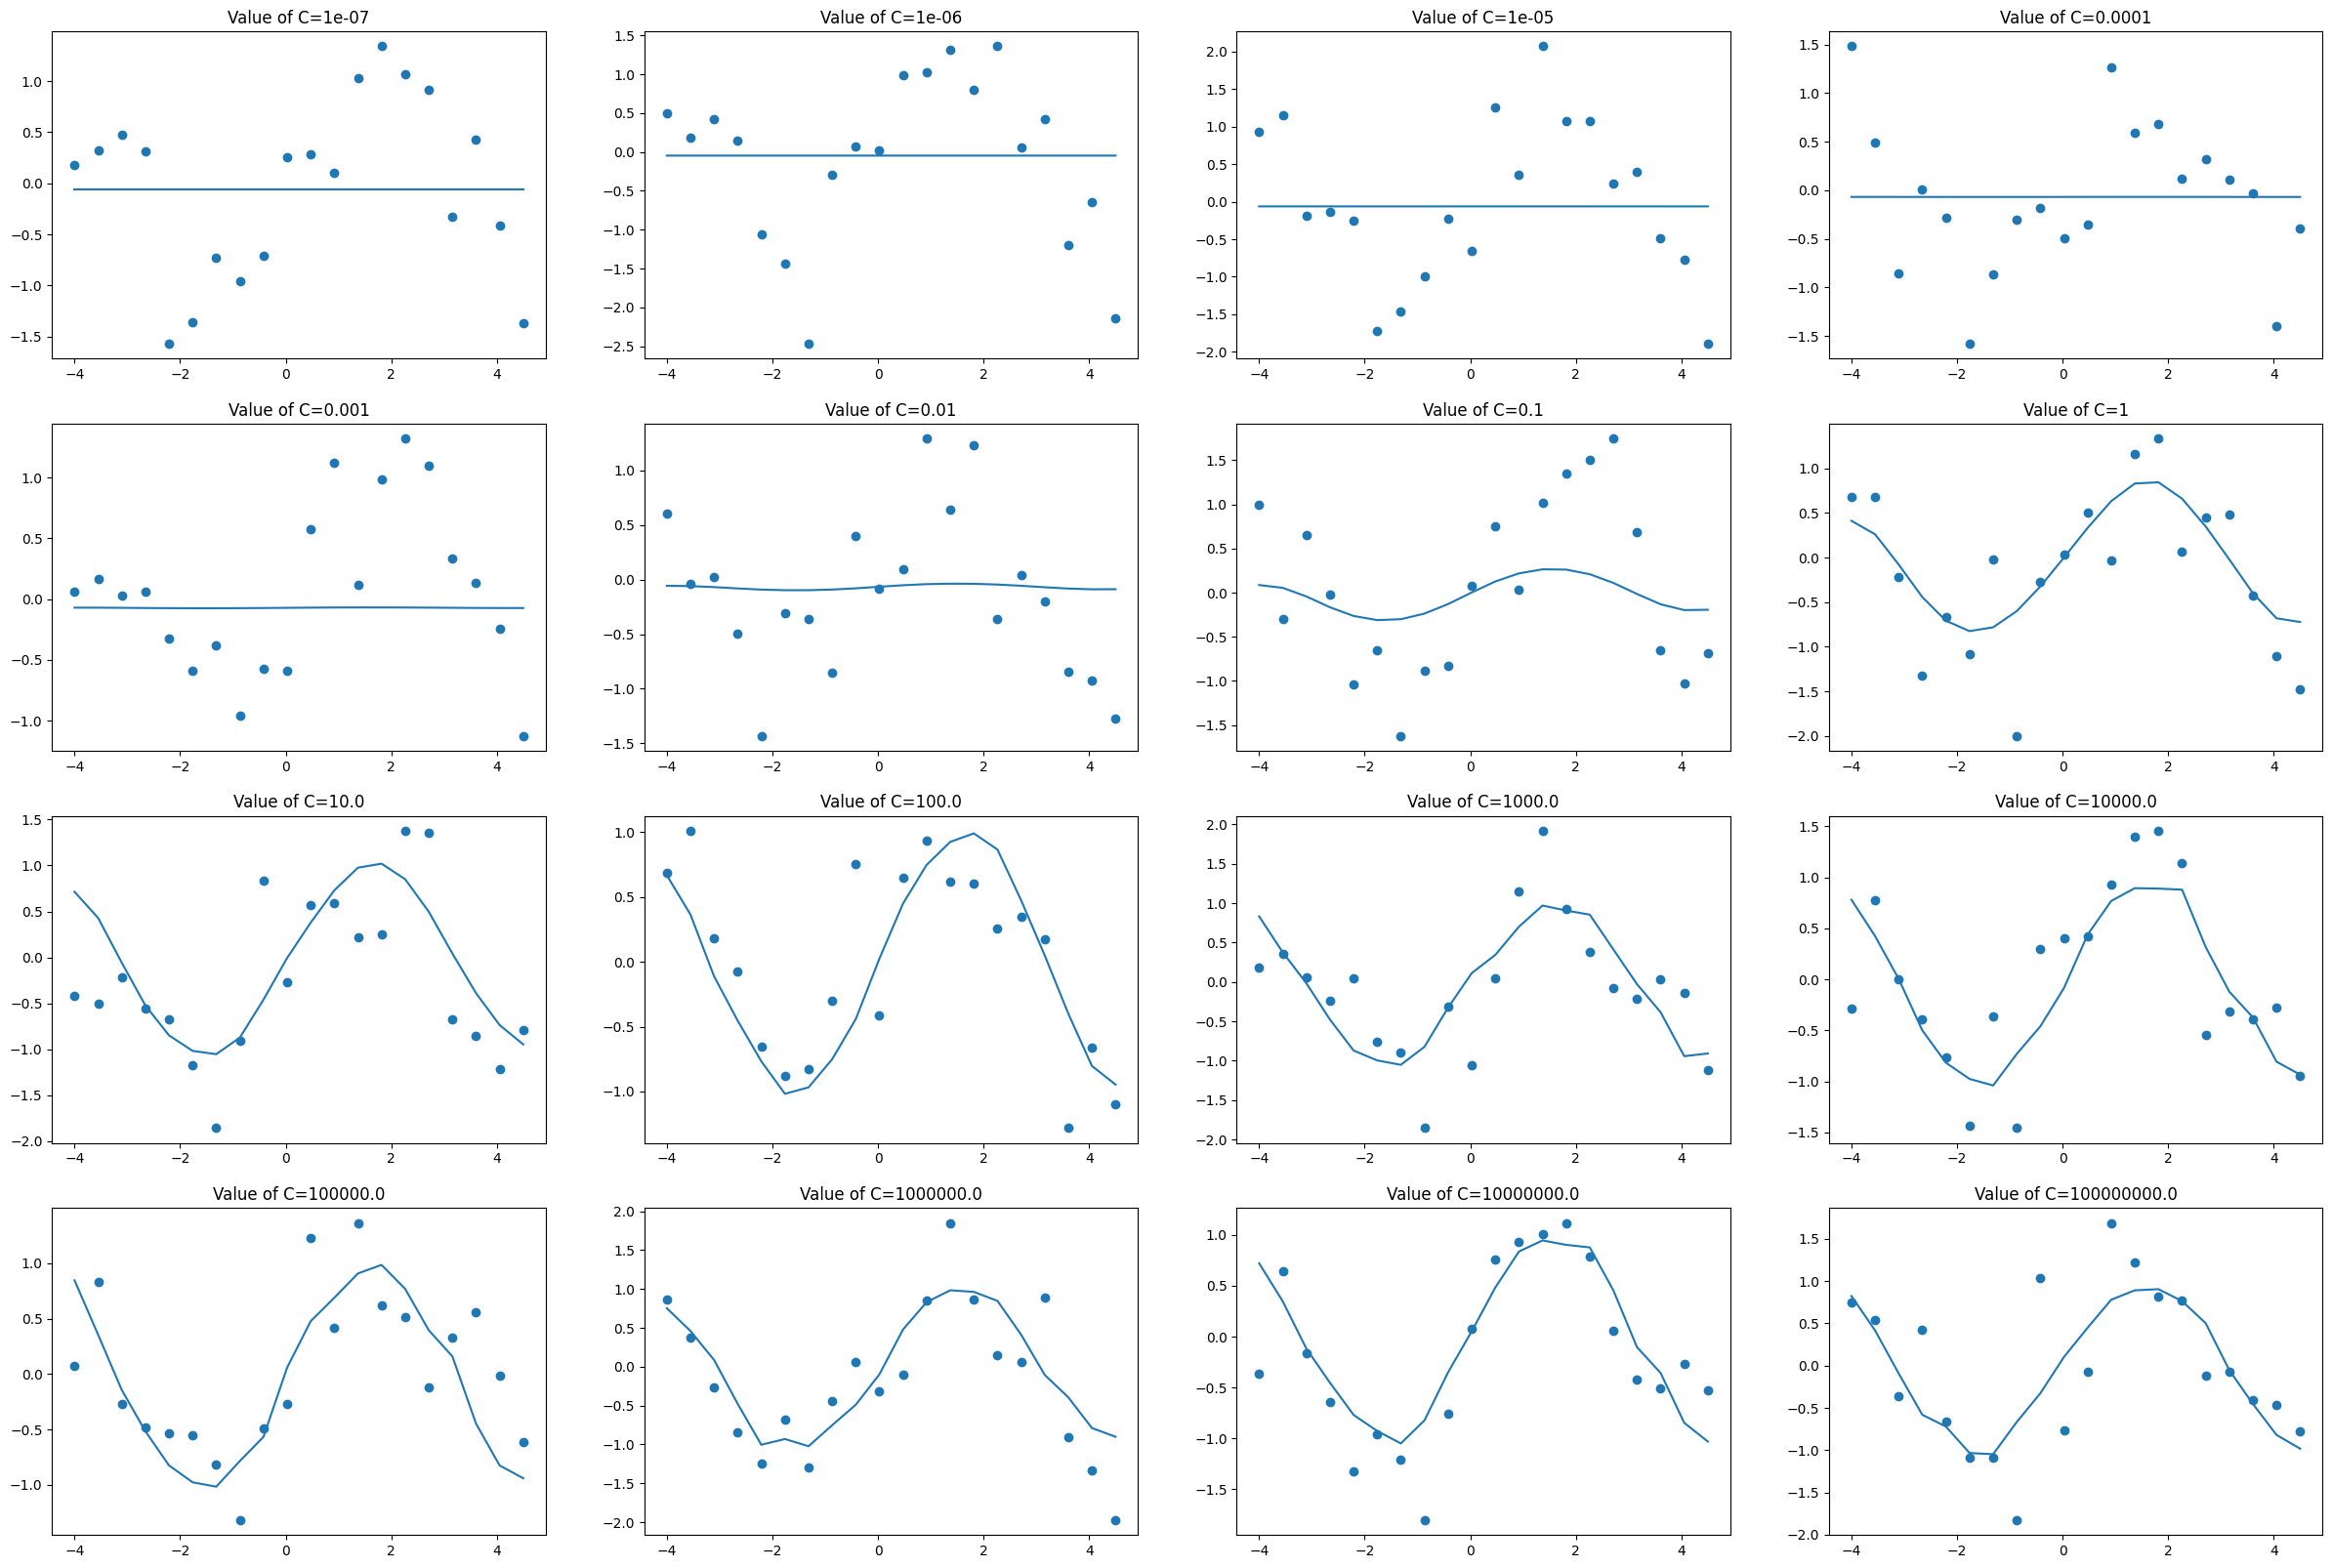

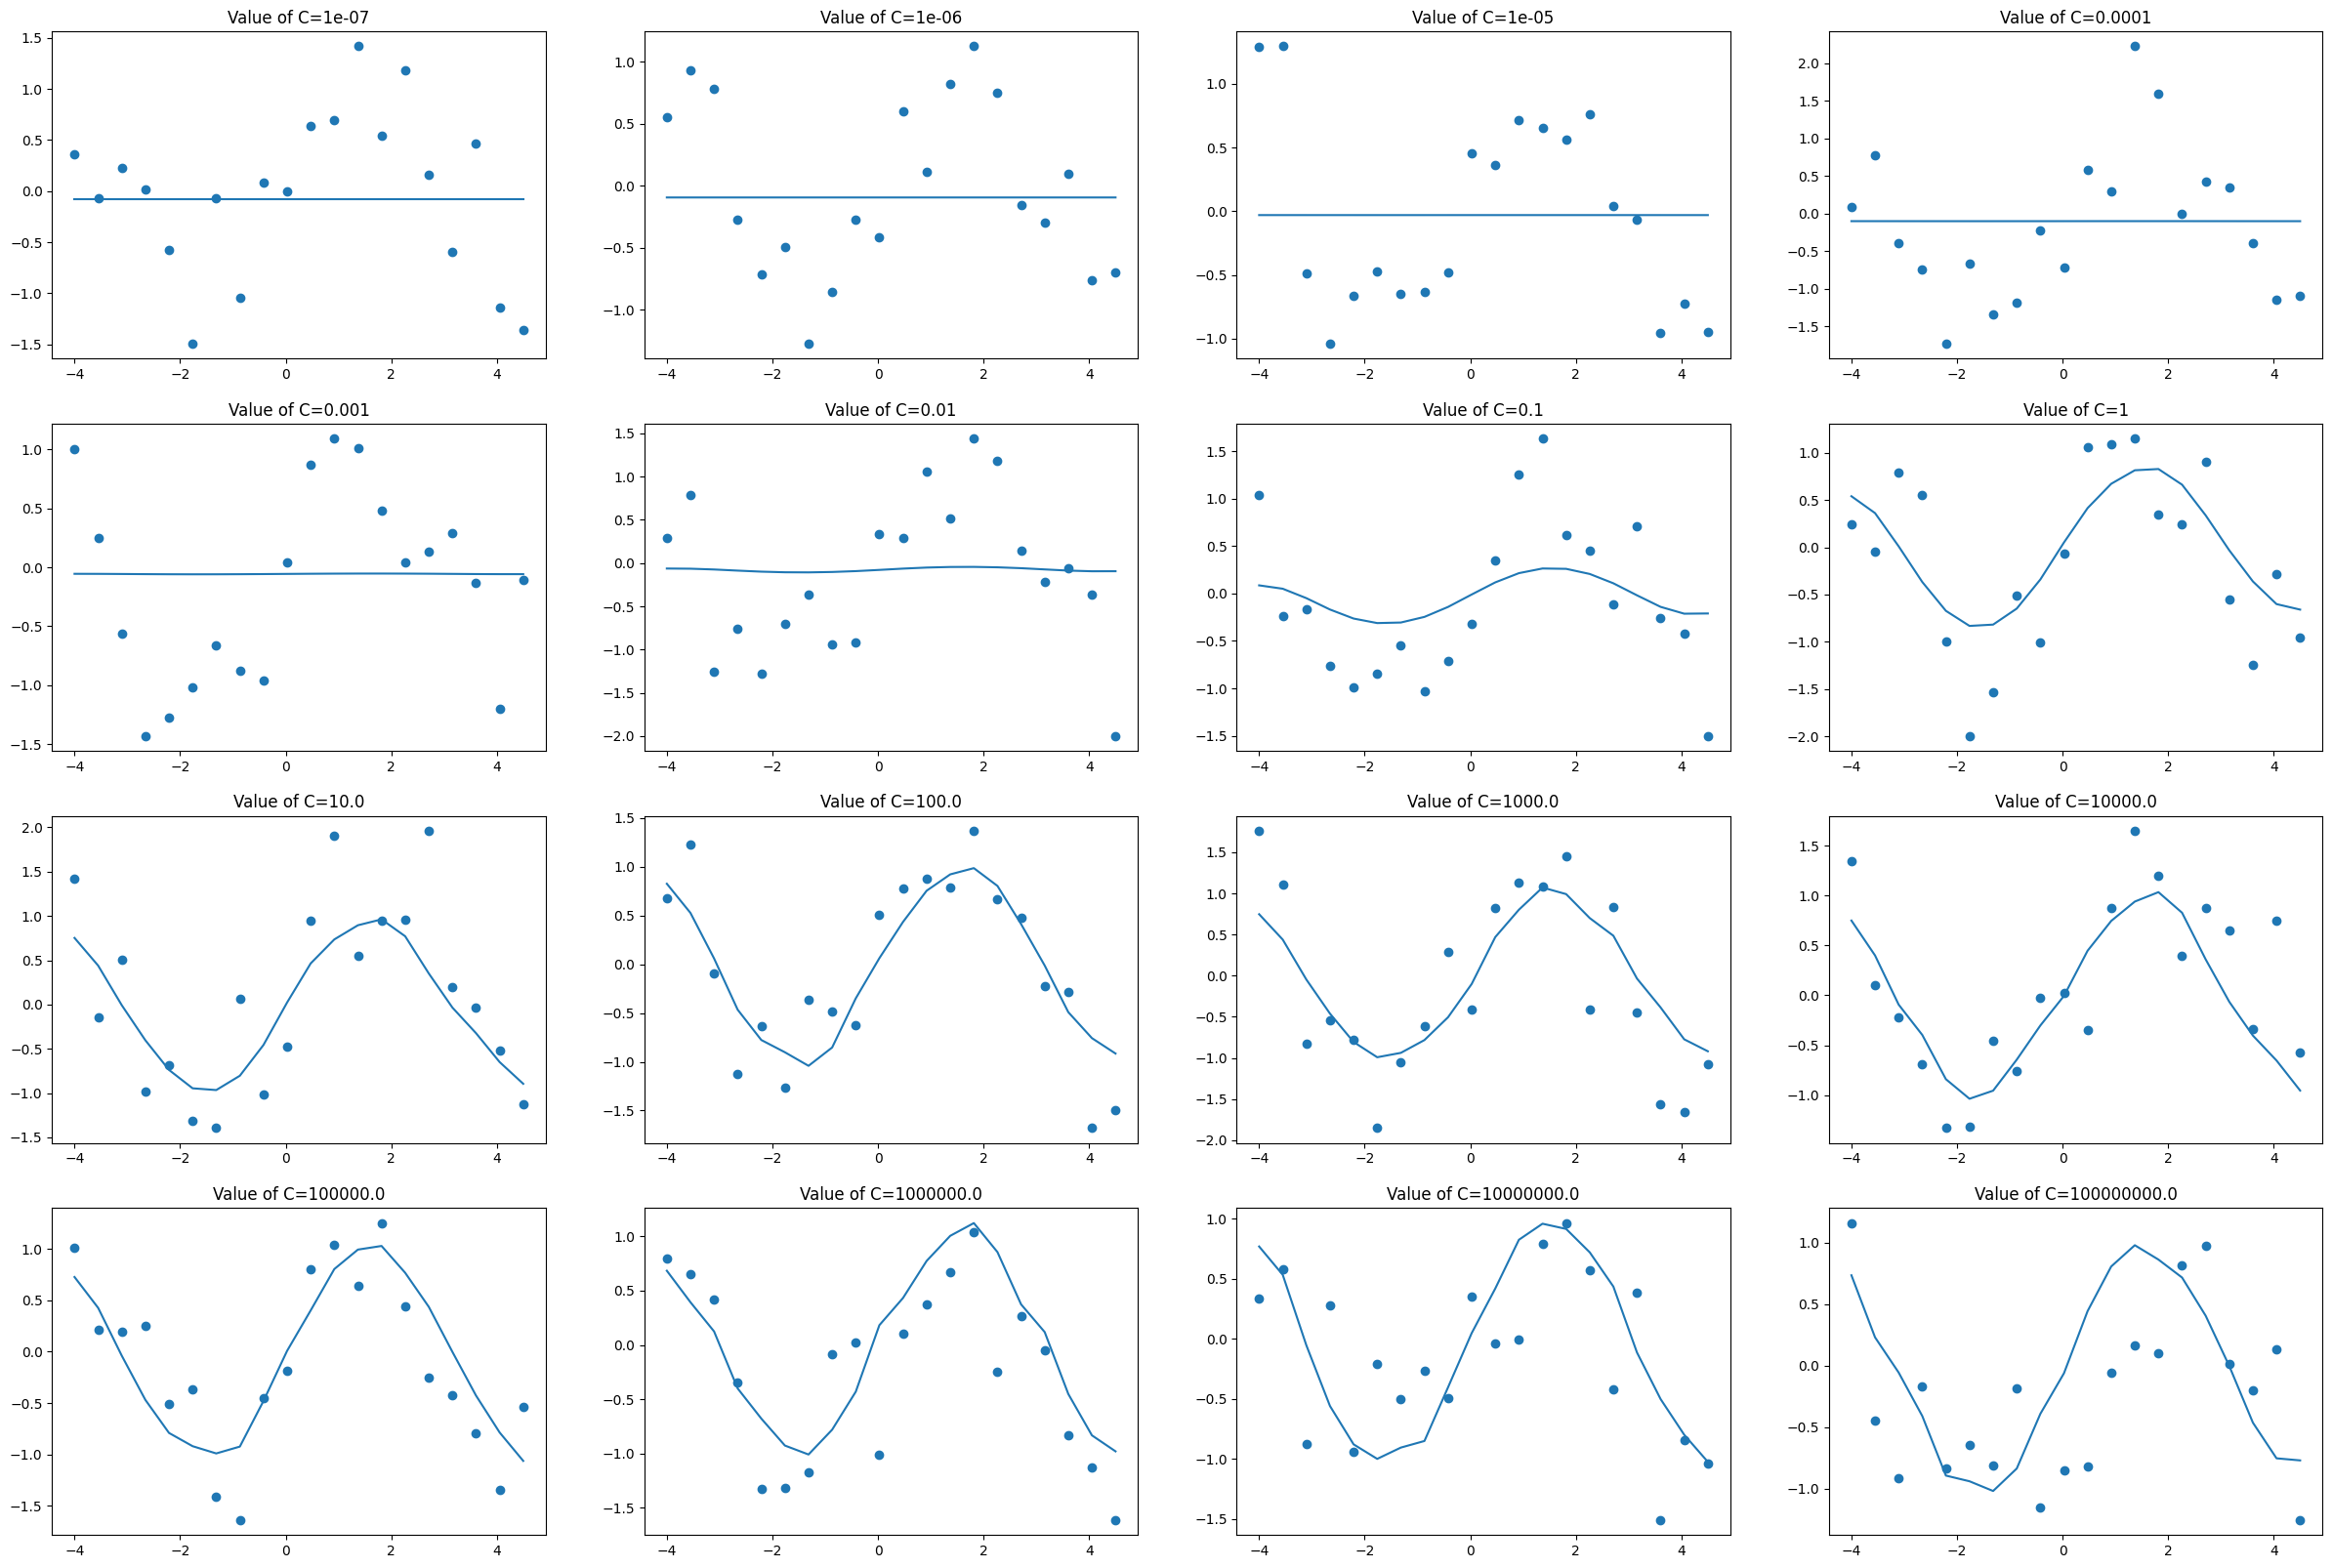

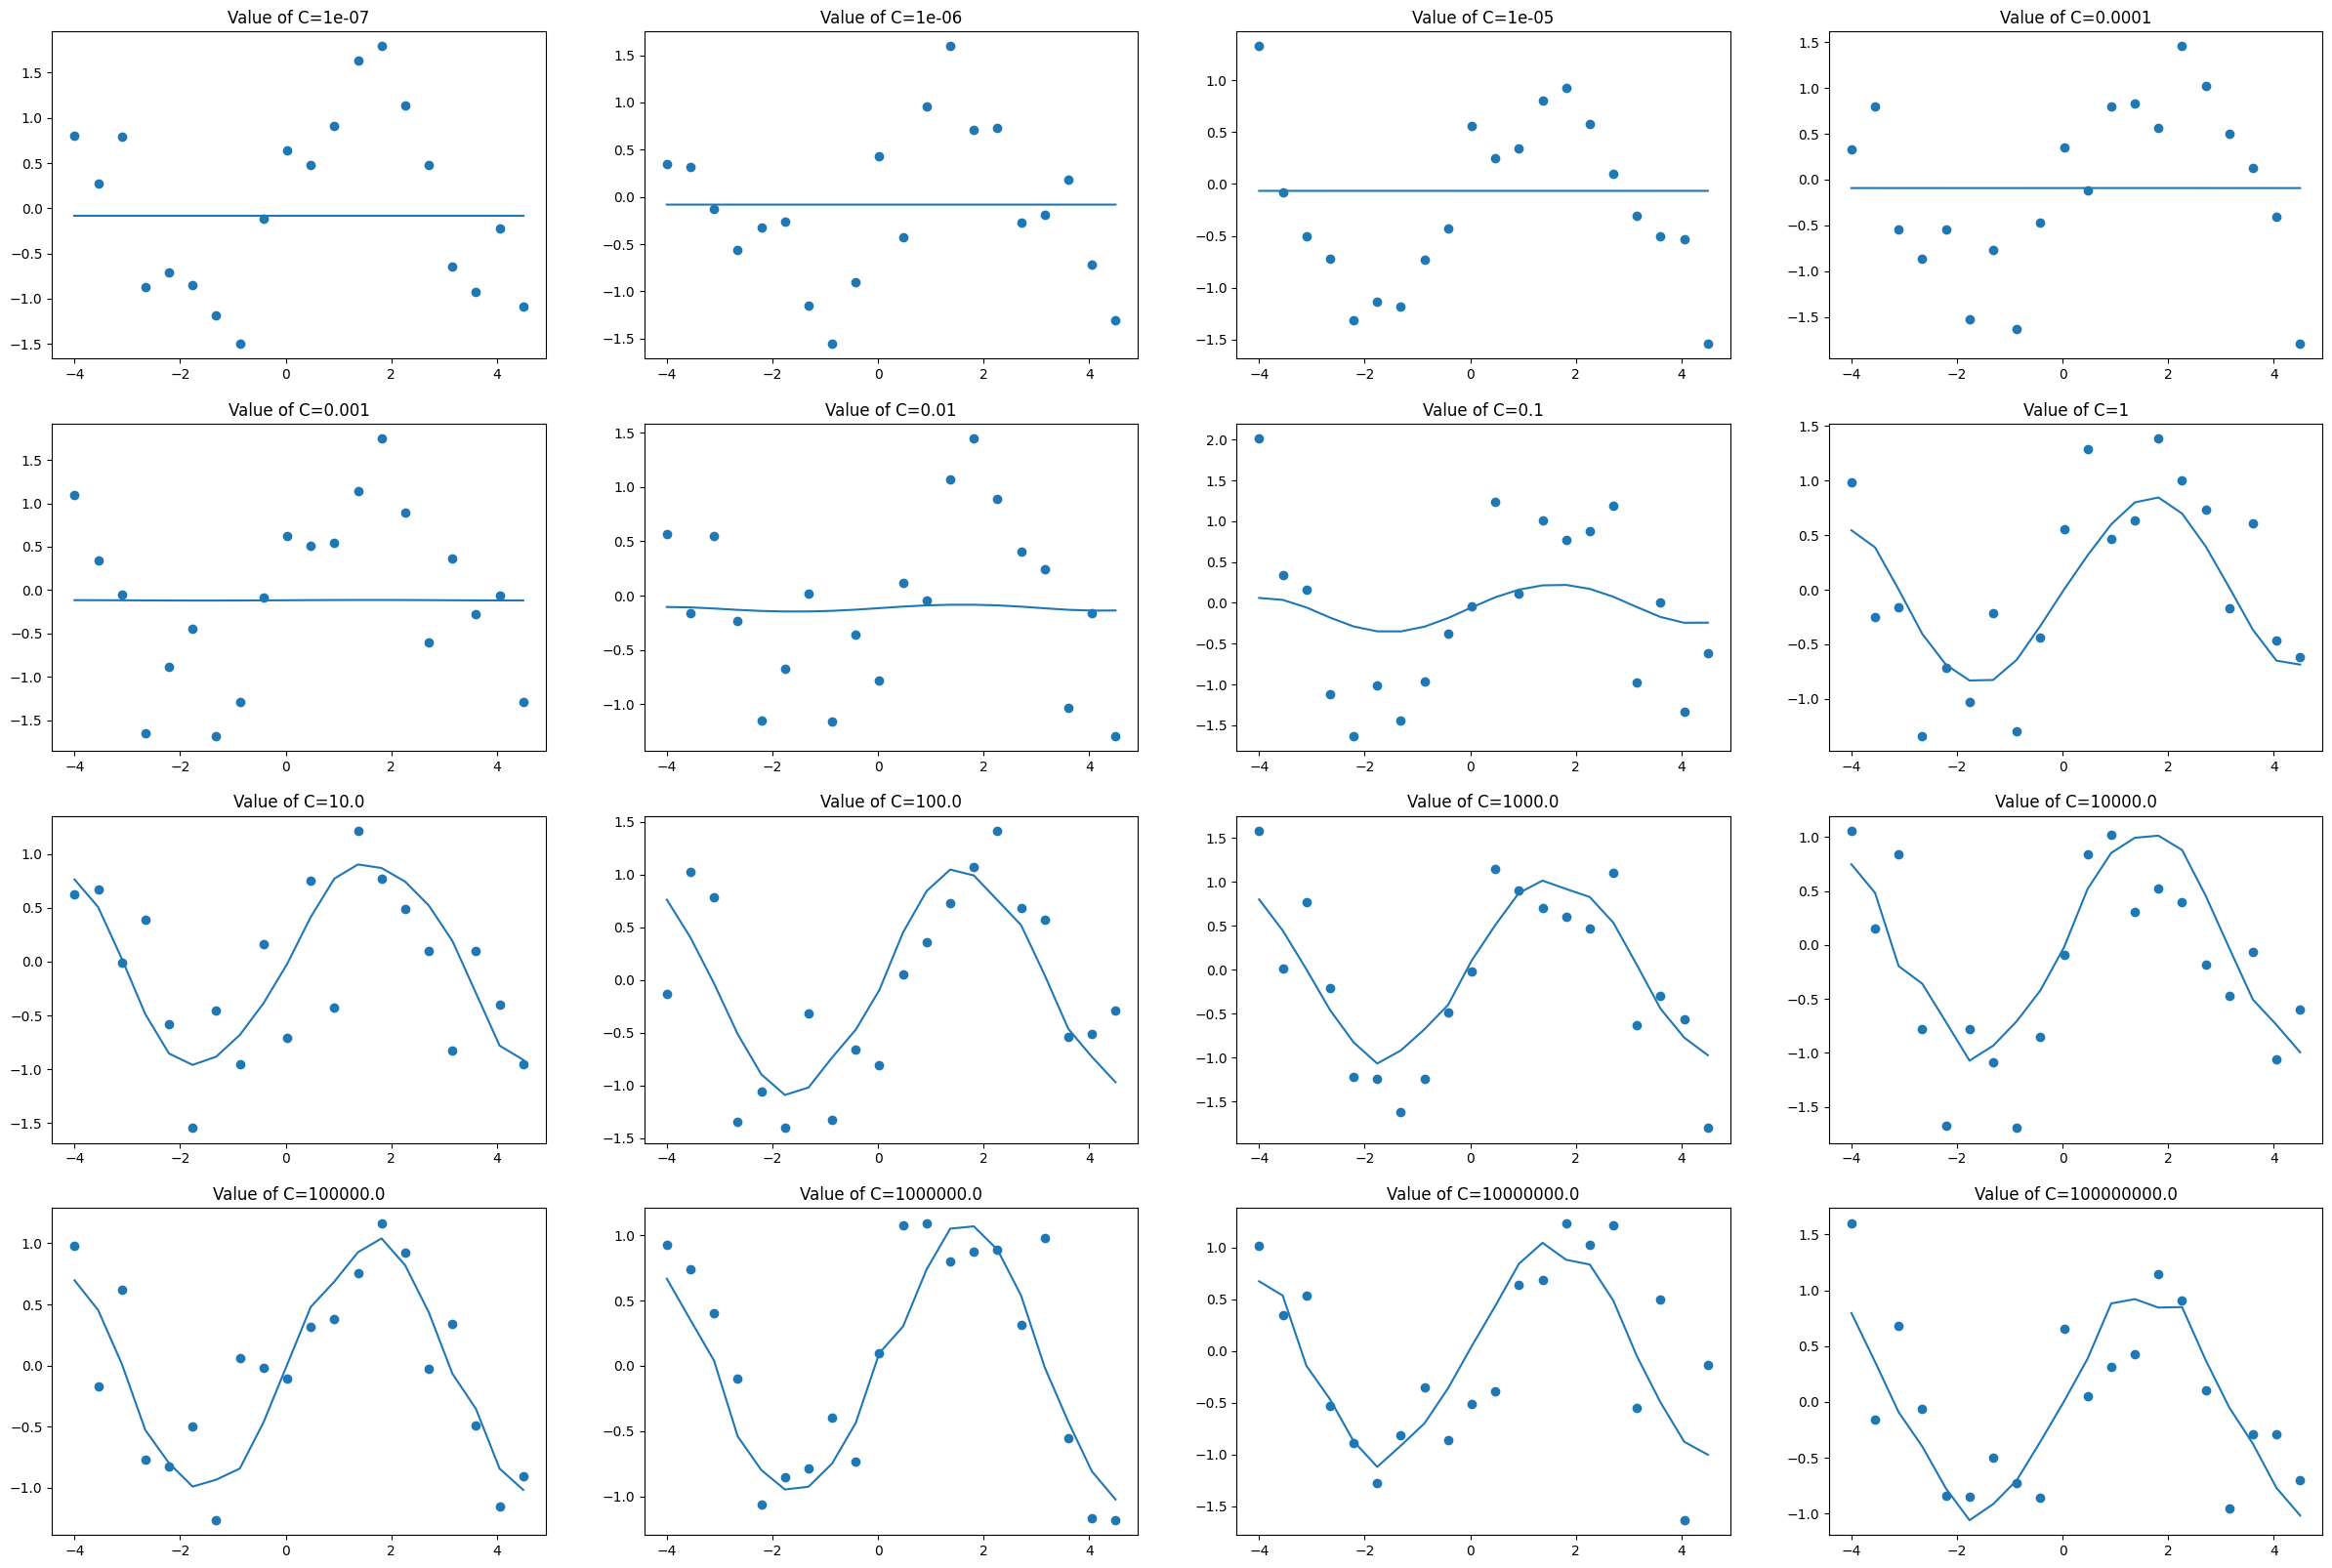

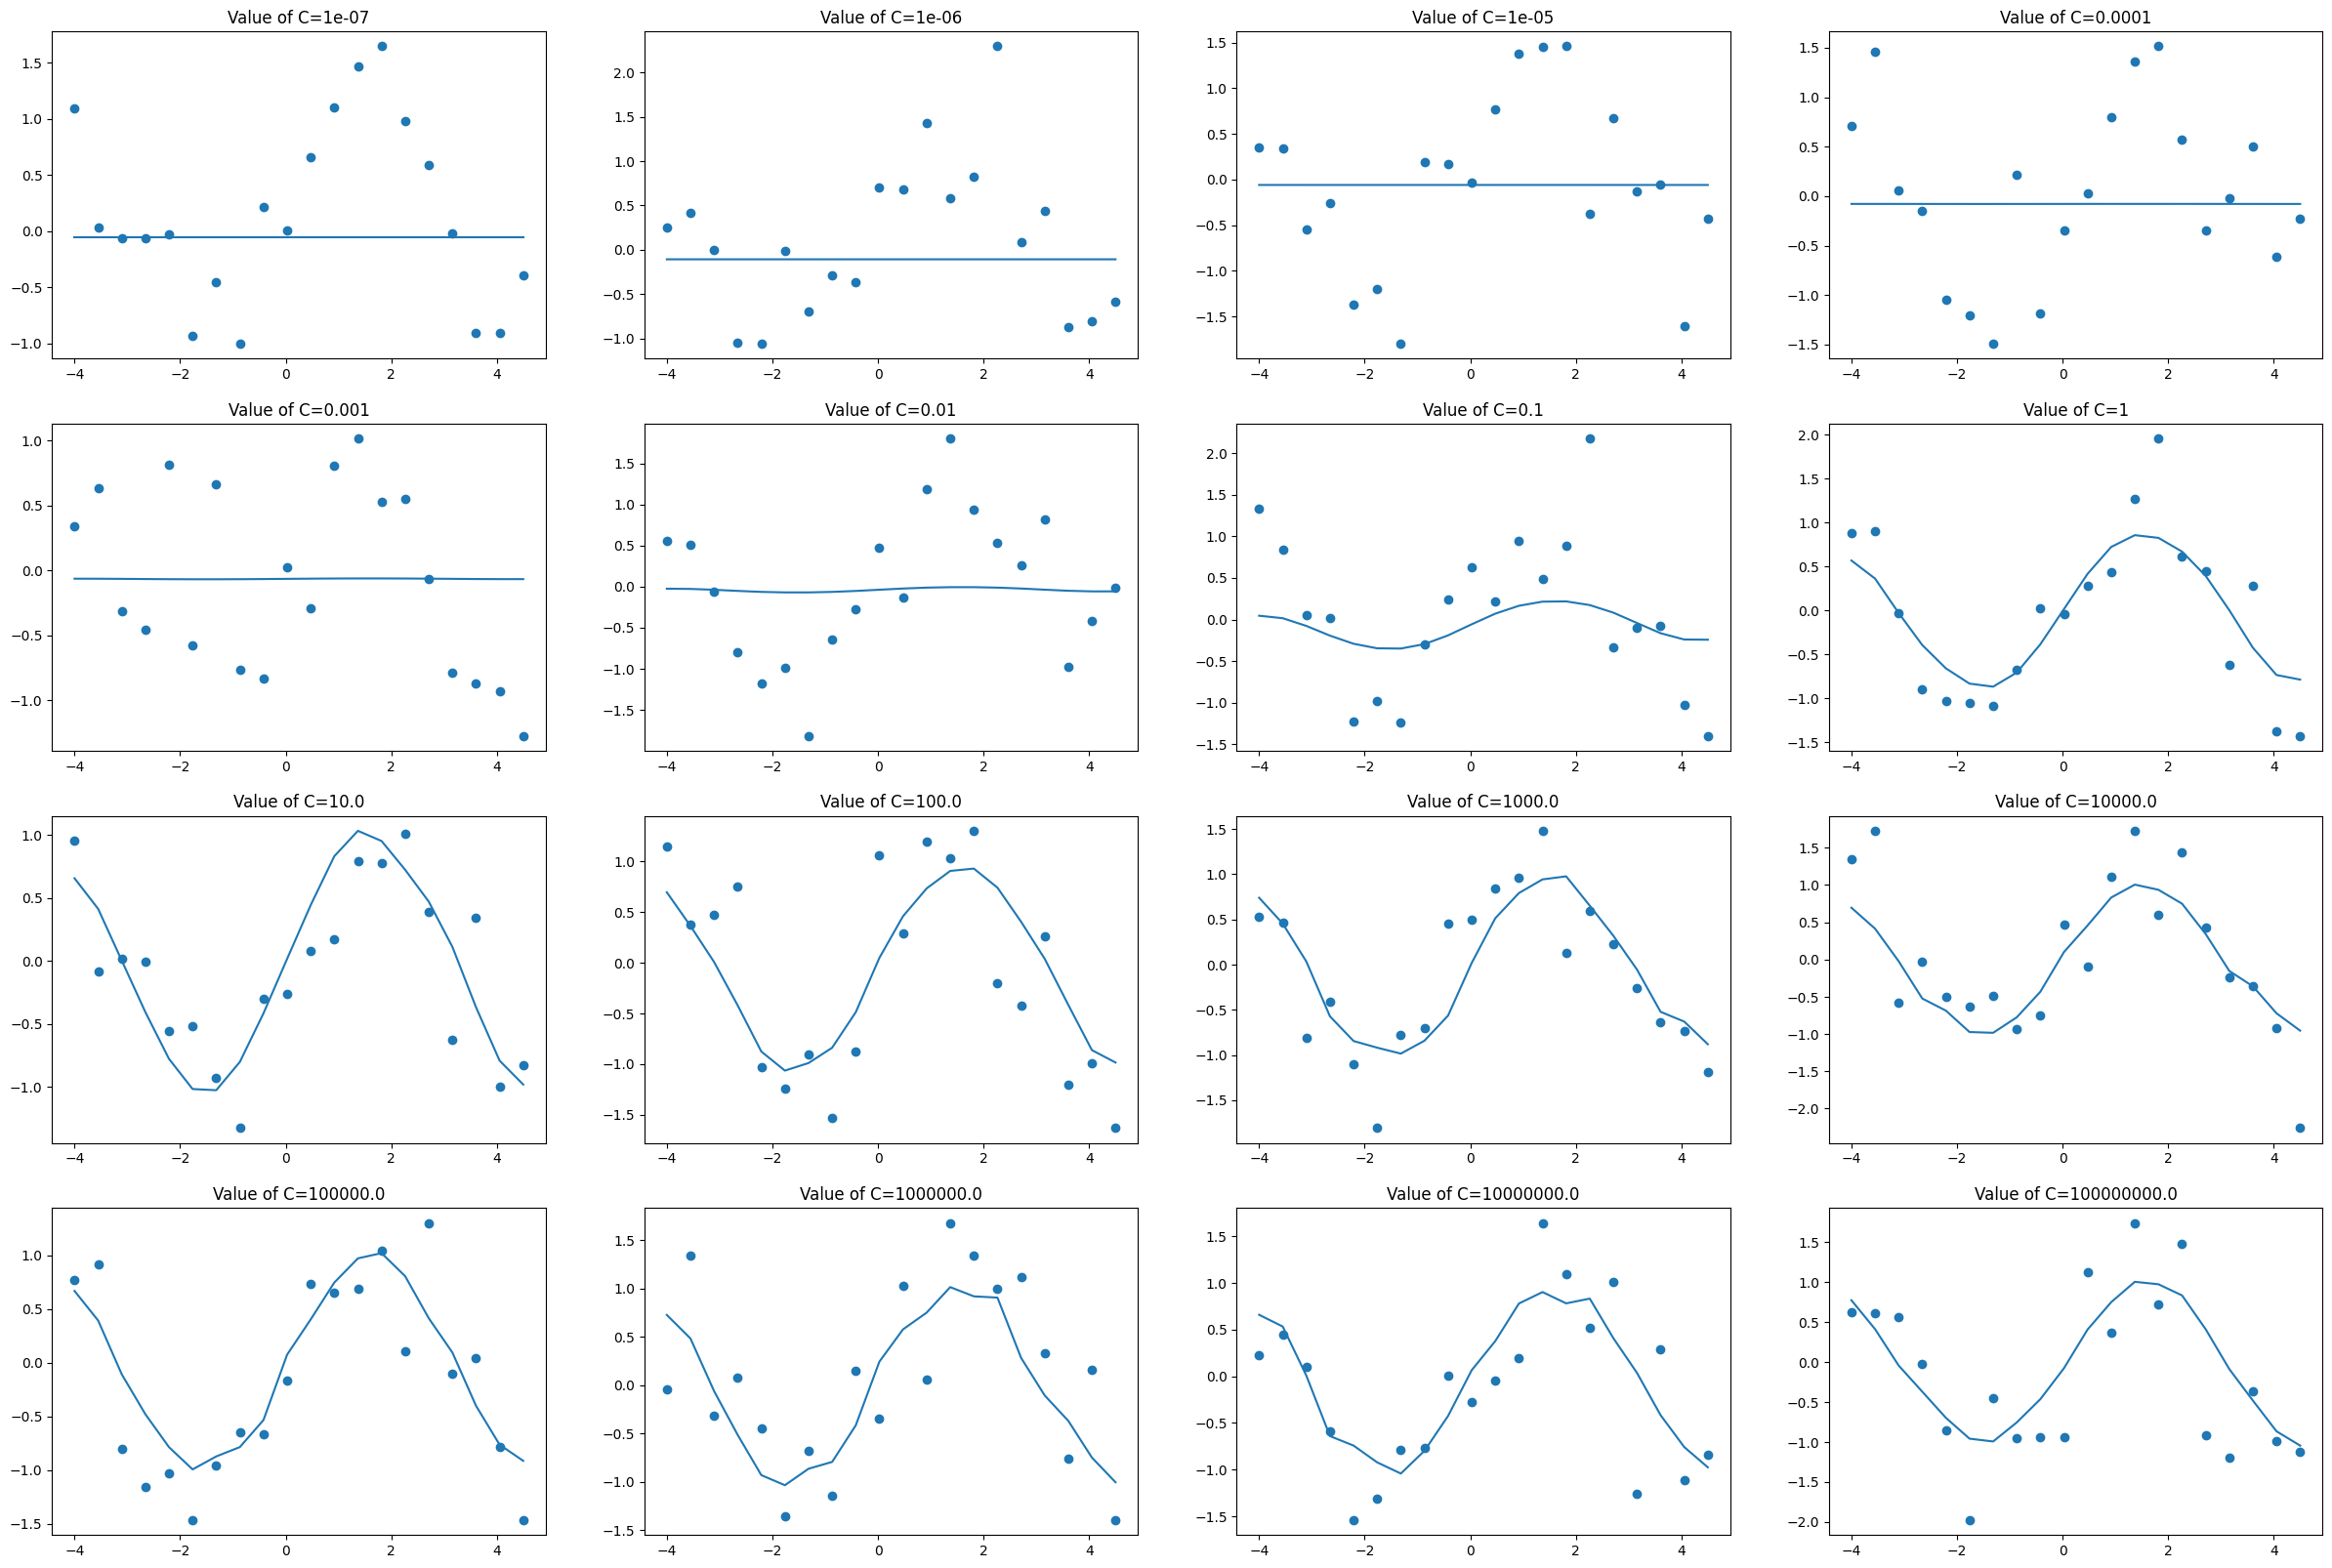

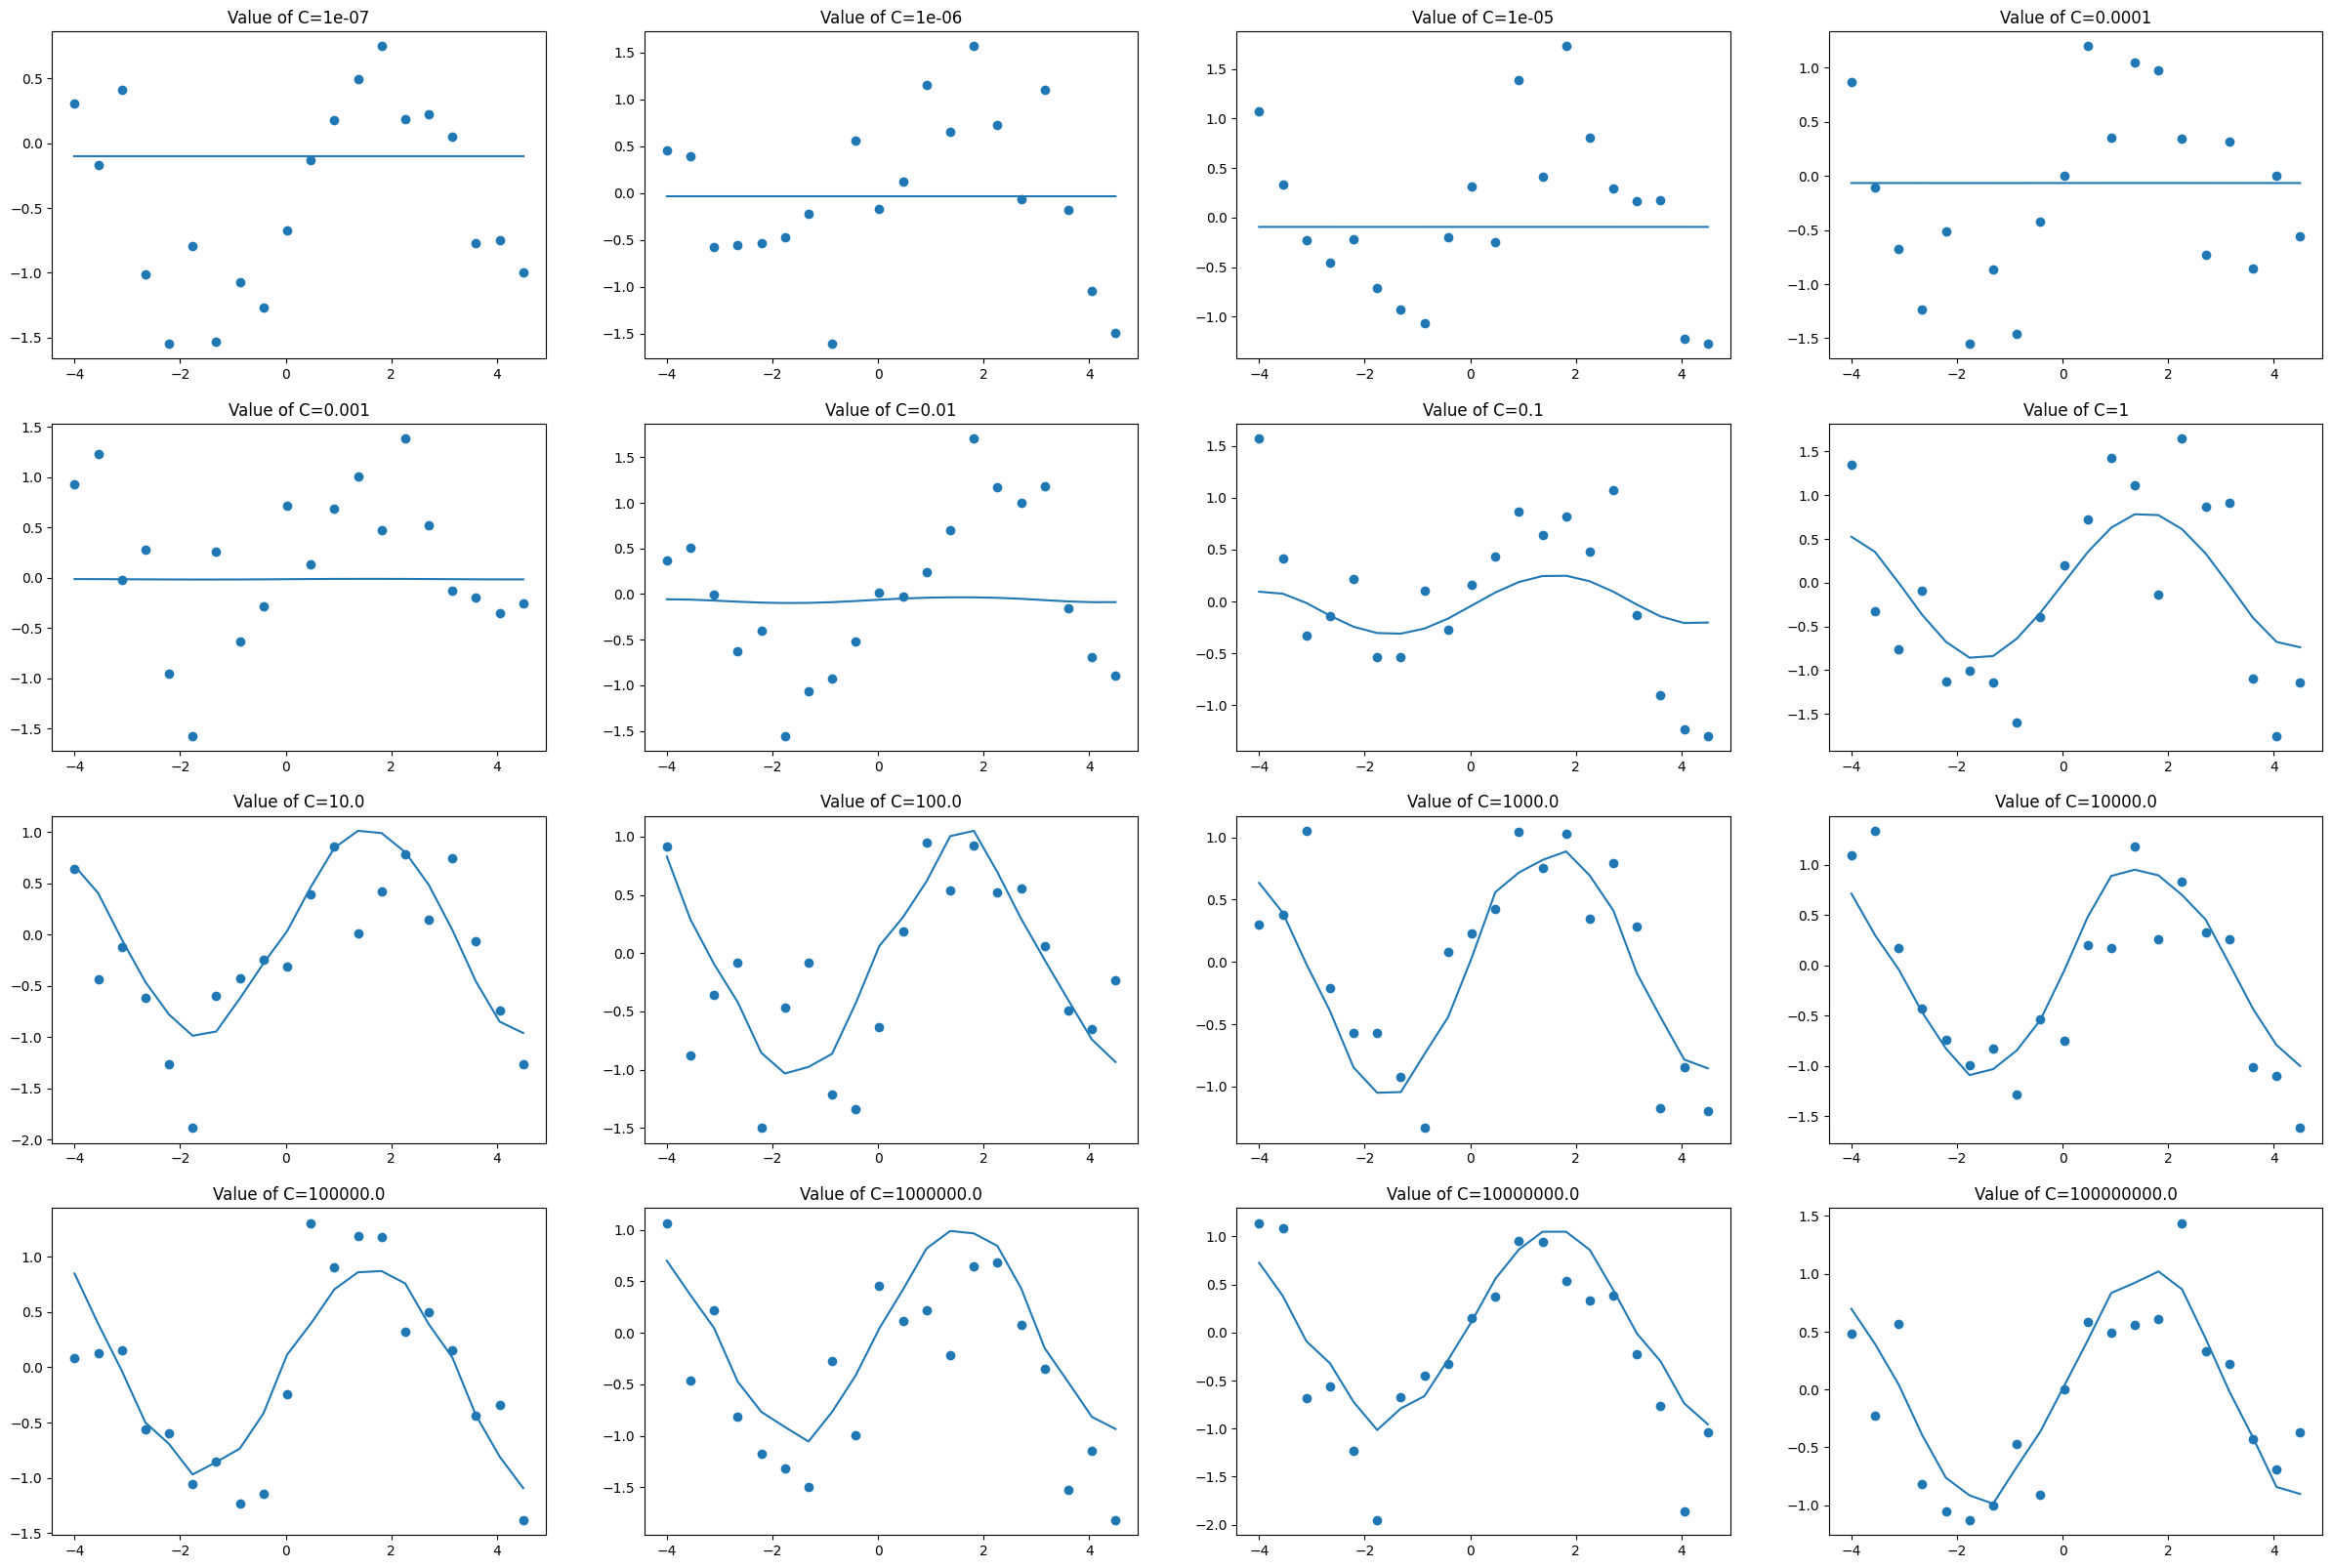

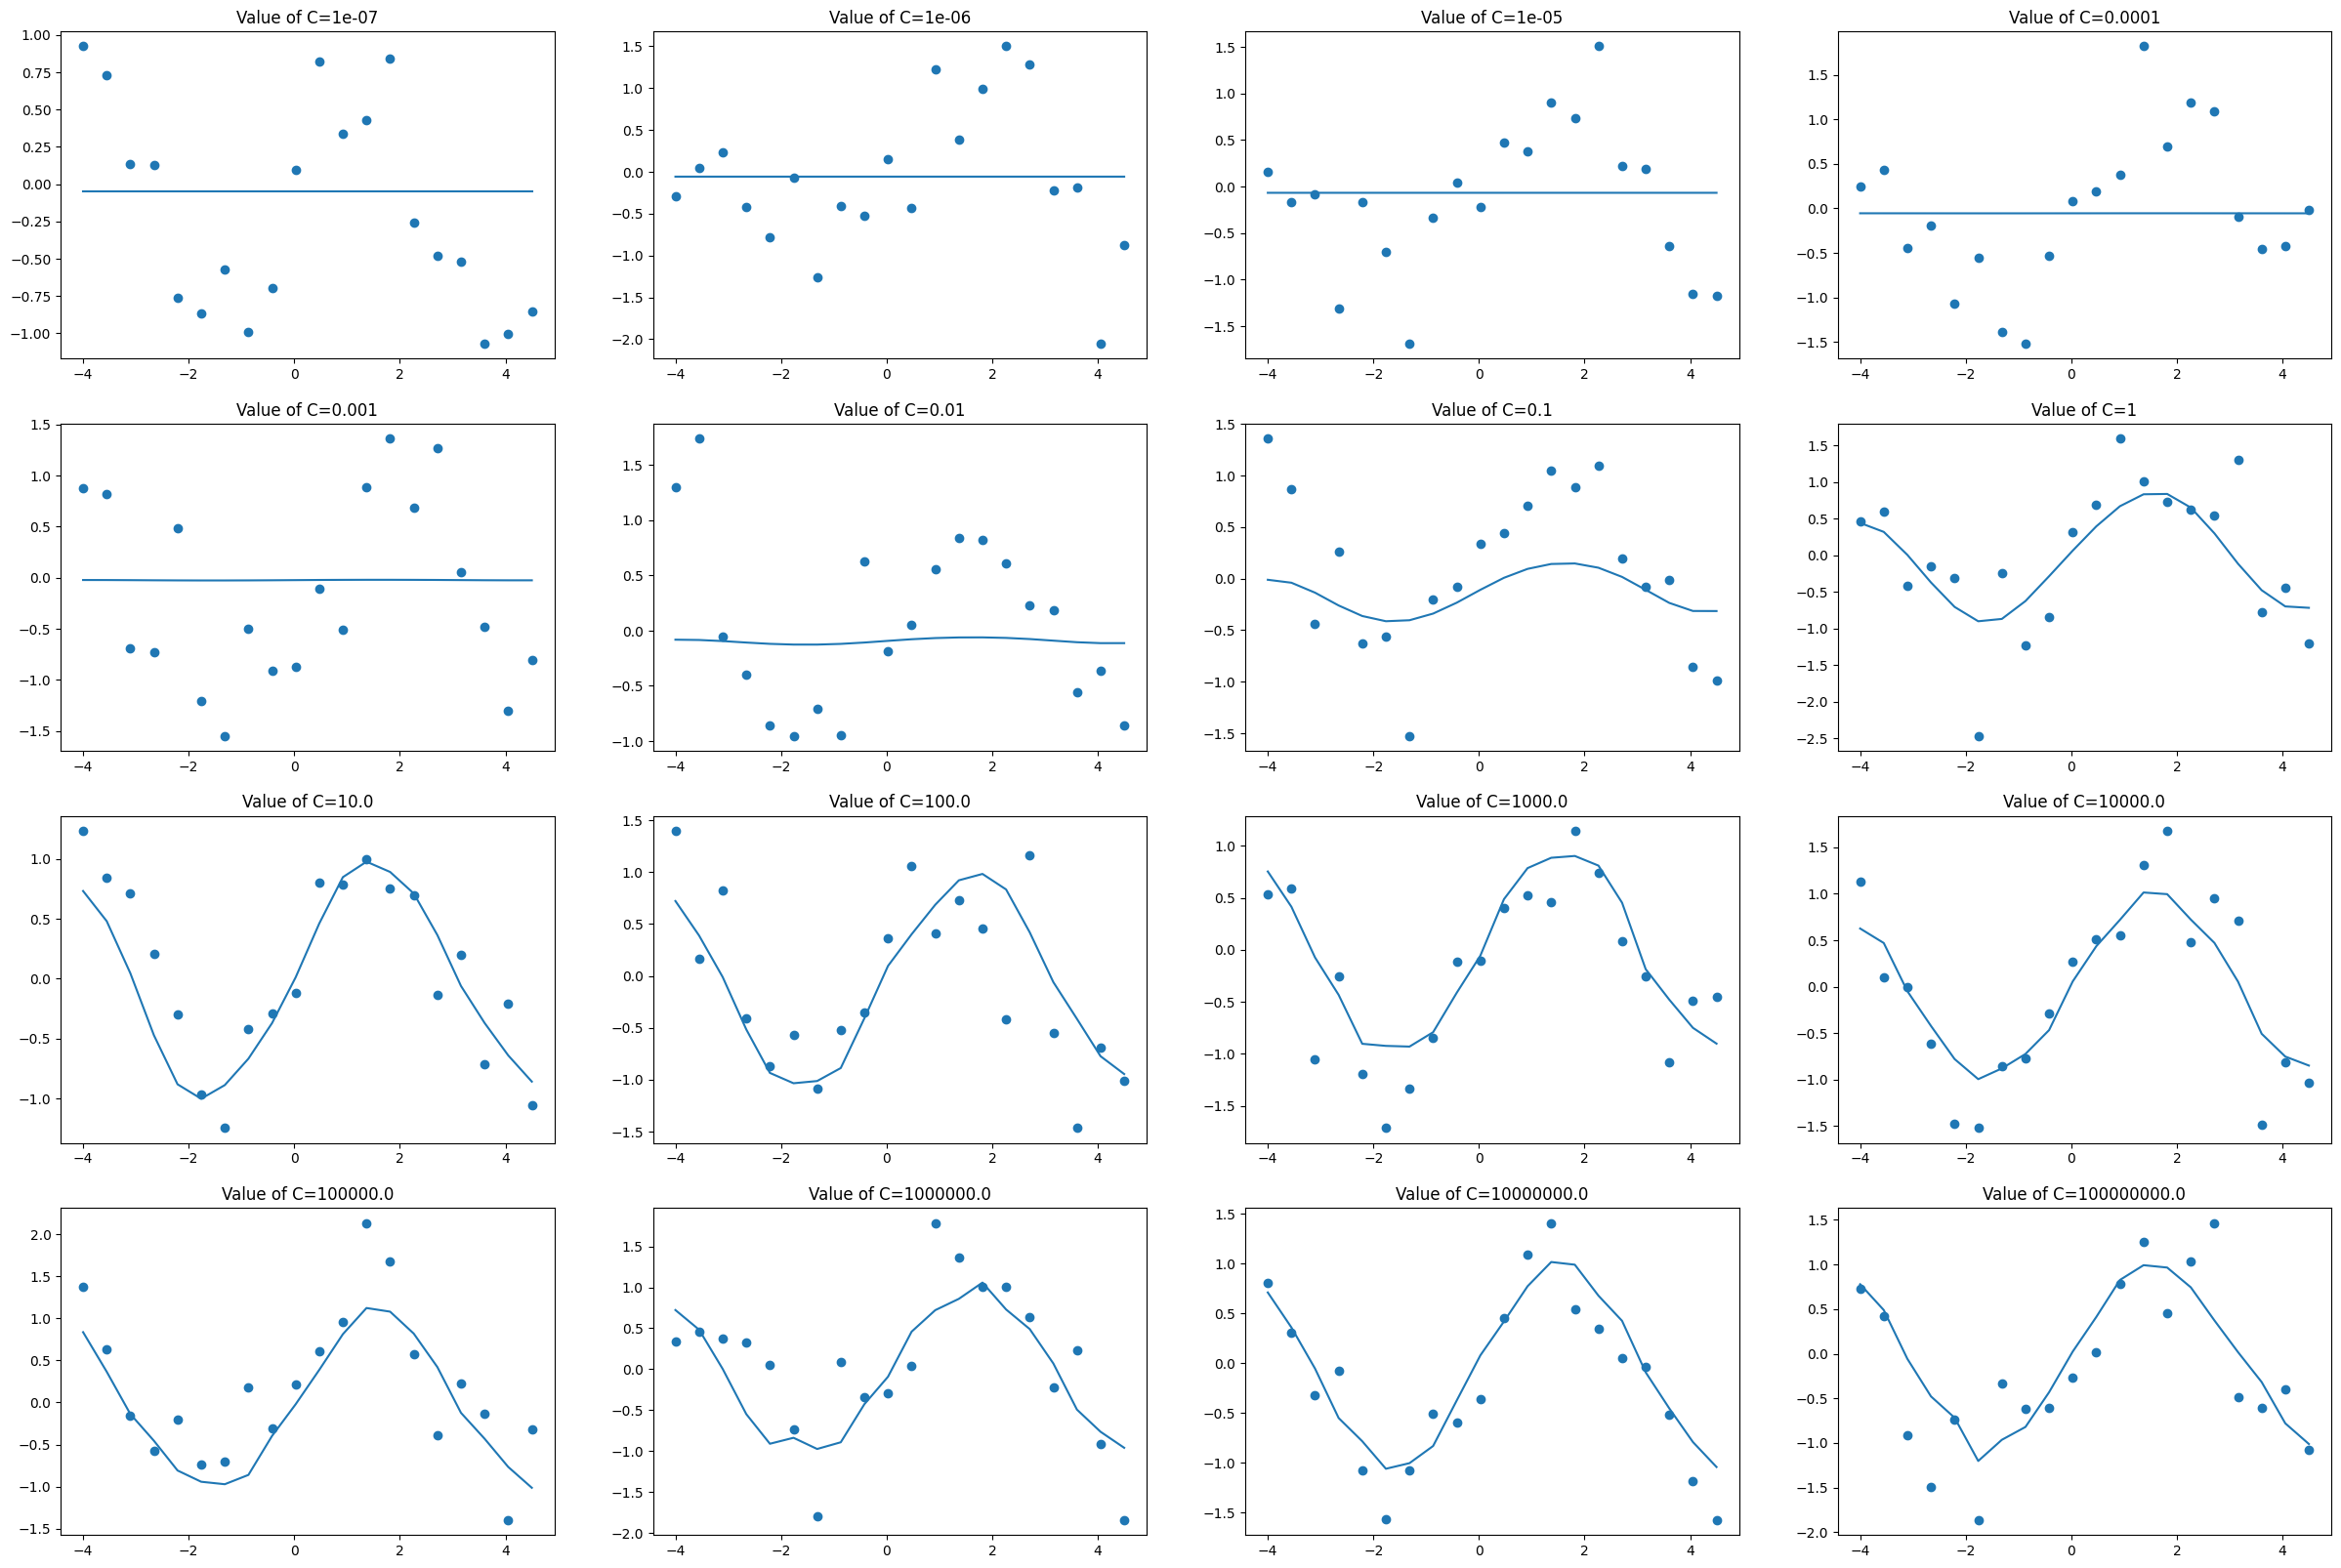

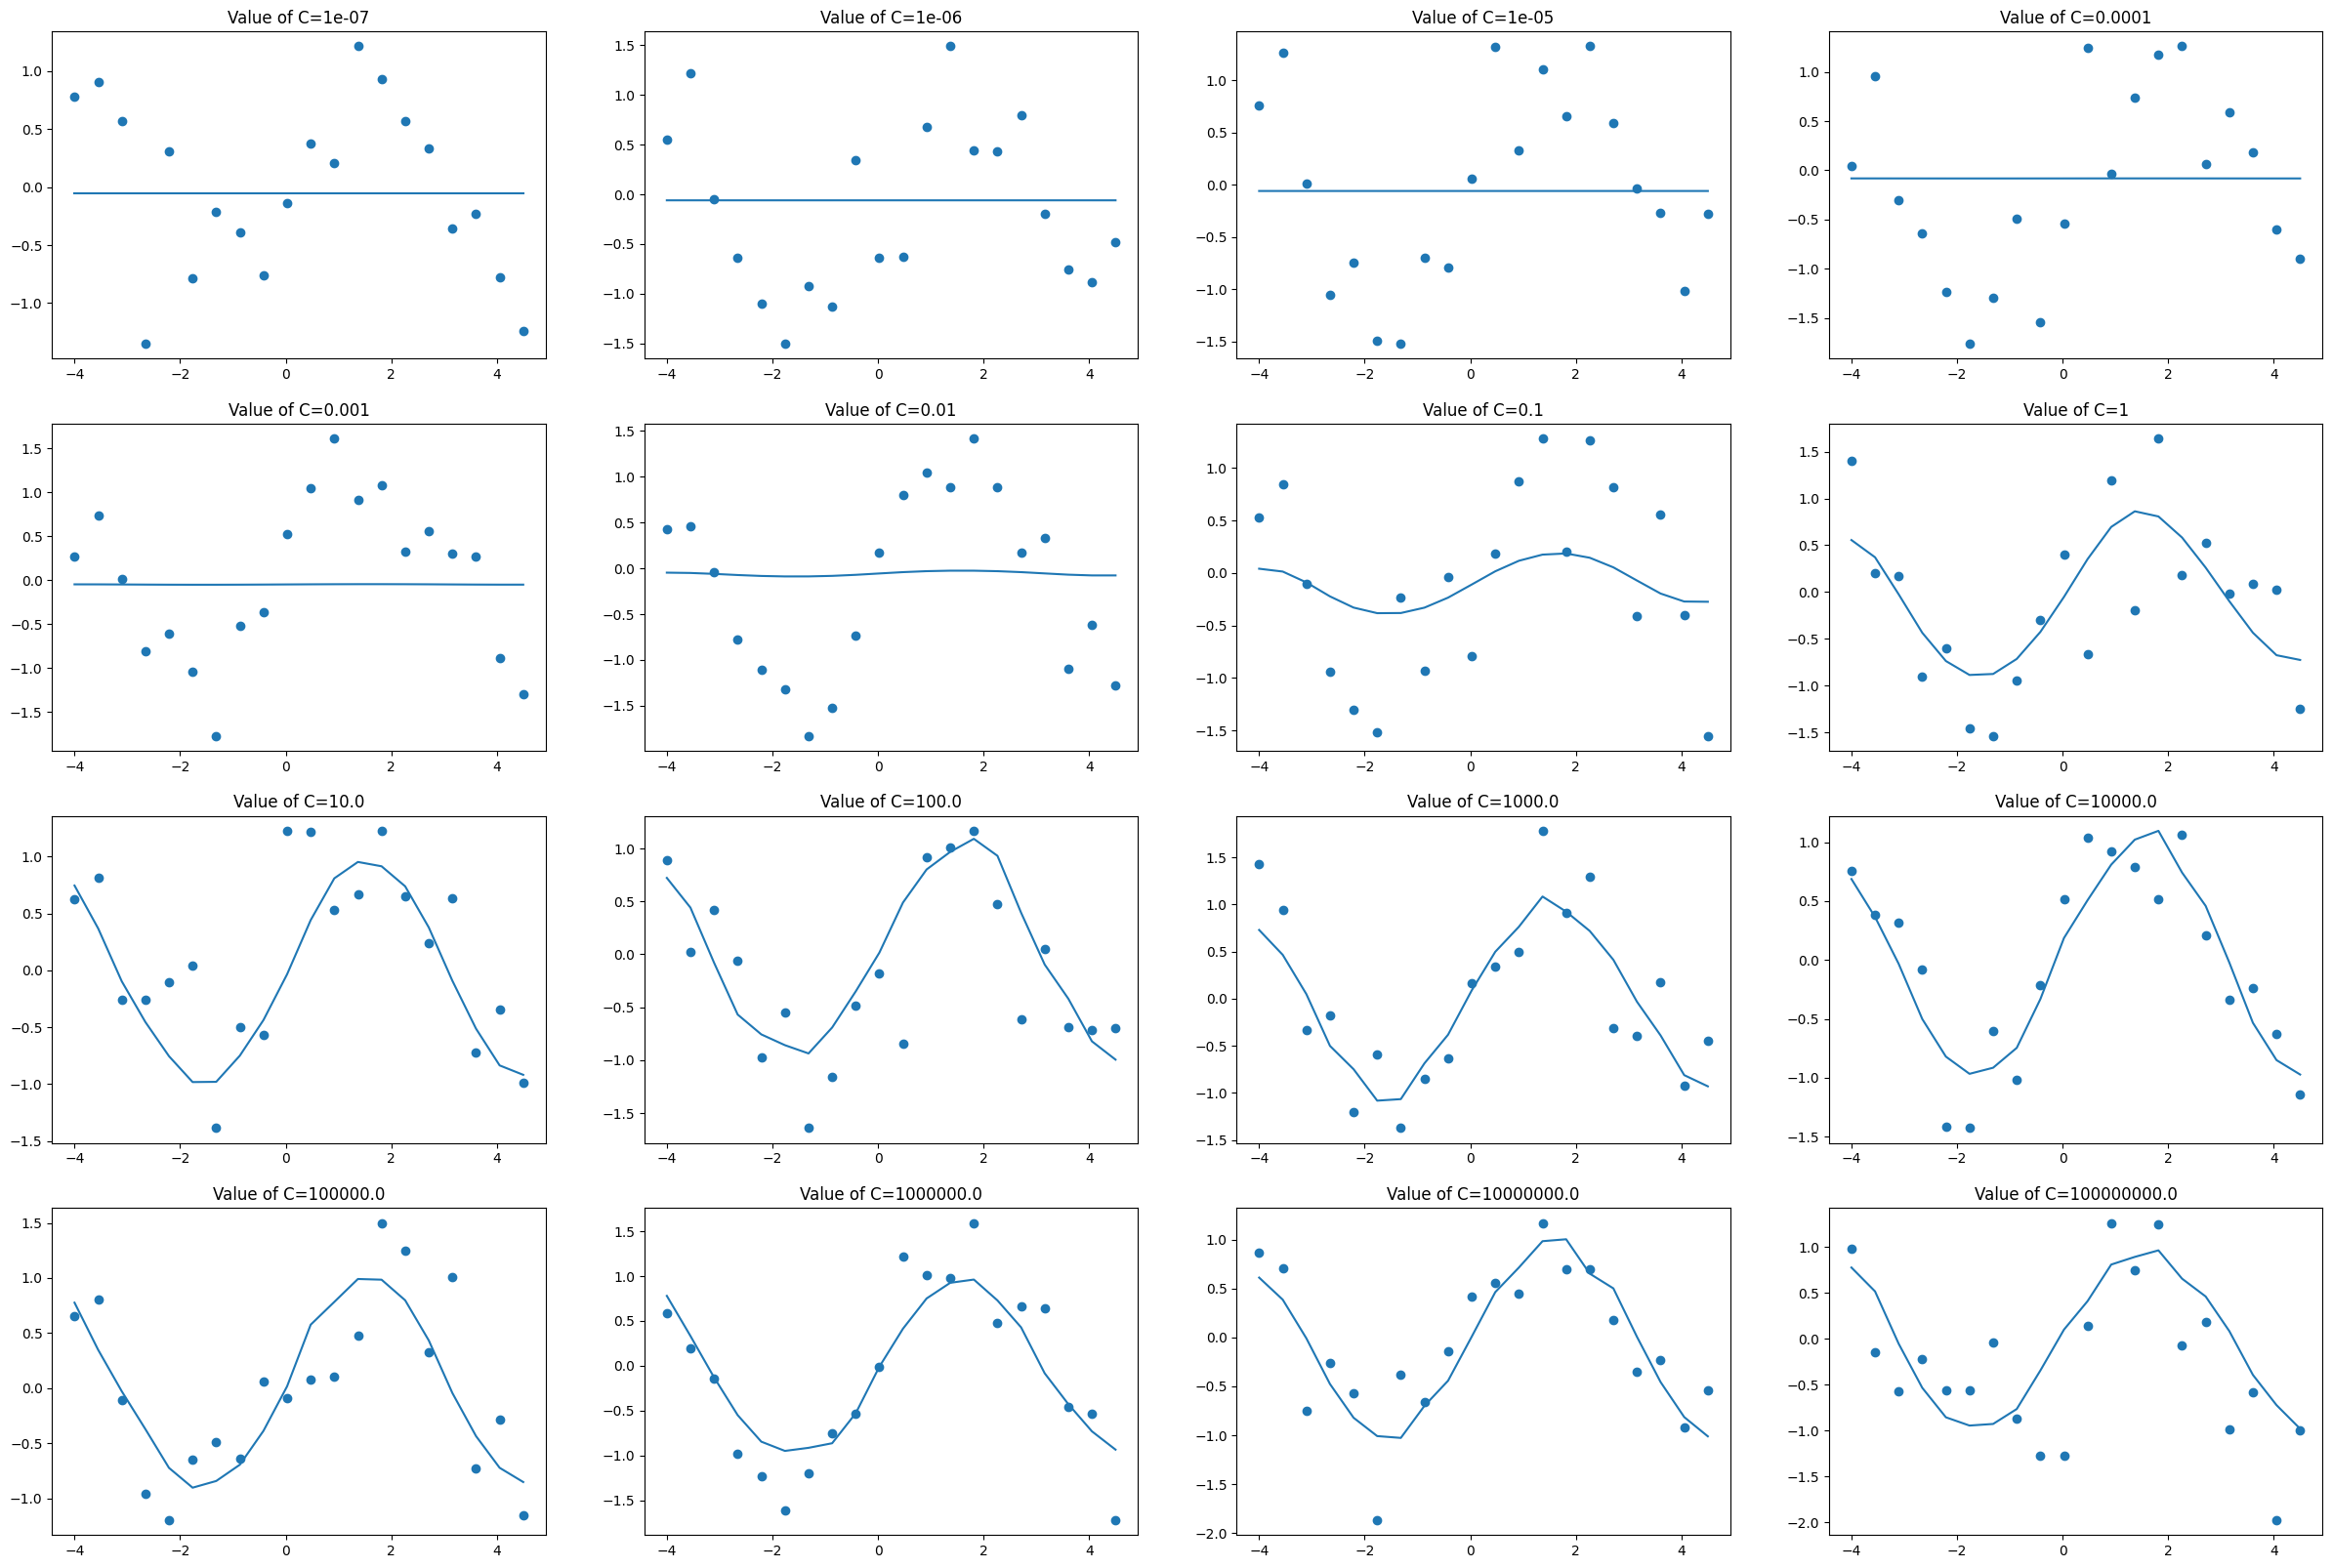

In [8]:
noise_list=[0.2,0.5,0.7,0.9,1.5,2.5,4,6,8,10,100]
var_list=[]
bias_list=[]


for noise in noise_list:
    def sample_data_batch(x_min,x_max,N_samples):
    ## The x-data is fixed (no variability here)
        X = np.linspace(x_min,x_max,N_samples)
        noise_level = 0.5
        noise = noise_level * np.random.randn(N_samples)
        ## The variability here depends only from the noise we add on the samples
        return [X,f(X) + noise]

        #create the figure
    plt.figure(figsize=(30,20))
    sub=0
    for parameter_value in list_C:
        sub+=1
        #creating a subplot
        plt.subplot(4,4,sub)
        #Plotting a sample data batch
        plt.scatter(X,sample_data_batch(x_min,x_max,N_samples)[1])
        poly = SVR(kernel='rbf', C = parameter_value)
        prediction_on_data_sample = []

        for i in range(50):
            ## Sampling a new data batch
            current_data = sample_data_batch(x_min,x_max, N_samples)
            ## Model training        
            svr = SVR(kernel='rbf', C=parameter_value, gamma='auto', epsilon=0.1) #I used those parameter in order to have faster execution
            svr.fit(current_data[0].reshape(-1,1), current_data[1])
            ## saving the prediction (and eventually plotting the results)
            prediction_on_data_train = svr.predict(X.reshape(-1,1))
            prediction_on_data_sample.append(prediction_on_data_train)

        ## We compute E_D(y_hat) (and eventually plot the result)
        expect_pred = np.mean(prediction_on_data_sample, axis=0)
        plt.plot(X, expect_pred, label='prediction')
        title="Value of C="+str(parameter_value)
        plt.title(title)


        ## We compute Var_D(y_hat)
        ## We first compute several samples for (y_hat - E(y_hat))**2
        variance = []
        for i in range(50):
            ## Sampling a new data batch
            current_data = sample_data_batch(x_min,x_max, N_samples)
            ## Model training        
            svr = SVR(kernel='rbf', C=parameter_value, gamma='auto', epsilon=0.1)
            svr.fit(current_data[0].reshape(-1,1), current_data[1])
            ## Compute the variance term as (prediction - E_D(y_hat))
            prediction_on_data_train = svr.predict(X.reshape(-1,1))
            variance.append((prediction_on_data_train - expect_pred)**2)

    ## We compute the variance E[(y_hat - E(y_hat))**2]
    variance = np.mean(variance, axis=0)

    ## We integrate bias and variance along the x-axis
    bias = np.mean((f(X) - expect_pred)**2)
    var = np.mean(variance)
    var_list.append(var)
    bias_list.append(bias)
    
print(var_list)
print(bias_list)

Here, i created a list of noise level that i use to loop over the previously defined function in order to be able to create a dataframe wit the different level of noise and their corresponding bias and variance.

In [10]:
noise_list=[0.2,0.5,0.7,0.9,1.5,2.5,4,6,8,10,100]
var_list=[]
bias_list=[]

for noise in noise_list:
    var,bias=ex1(noise)
    var_list.append(var)
    bias_list.append(bias)
    
data = list(zip(var_list, bias_list))

df = pd.DataFrame(data, columns=['Variances', 'Biases'], index=noise_list)
df

Variances        Biases
0.2      0.001000      0.035149
0.5      0.003822      0.221111
0.7      0.007563      0.443110
0.9      0.020239      0.773223
1.5      0.031195      2.199758
2.5      0.082774      5.389839
4.0      0.306202     16.505134
6.0      0.580761     38.392794
8.0      1.759388     66.317800
10.0     1.642895     97.035373
100.0  241.388803  10865.720304

We can clearly see that the more we increase the noise, the more bias and variance also increase

$\mathbf{Exercise\, 3.}$ Still from the example of Exercise 1, compute the difference between training error and testing error for different vaues of the regularization parameter _C_. 

In order to compute the difference between training error and testing error, i will use MSE from sklearn

In [34]:
train_errors=[]
test_errors=[]

for parameter_value in list_C:
    X_train, y_train = sample_data_batch(x_min, x_max, N_samples)
    X_test, y_test = sample_data_batch(x_min, x_max, N_samples)
    model = SVR(kernel="rbf", C=parameter_value)
    model.fit(X_train.reshape(-1,1), y_train)

    #predict
    y_pred_train = model.predict(X_train.reshape(-1,1))
    y_pred_test = model.predict(X_test.reshape(-1,1))

    #compute error on the current batch
    train_error=mse(y_train,y_pred_train)
    test_error=mse(y_test,y_pred_test)

    #store error
    train_errors.append(train_error)
    test_errors.append(test_error)

In [35]:
col_names=['C value','Train error','Test error','Difference']
differences = [np.abs(train_errors[i] - test_errors[i]) for i in range(len(train_errors))]
data = list(zip(list_C, train_errors, test_errors, differences))
df = pd.DataFrame(data, columns=['C value', 'Train error', 'Test error', 'Difference'])
df


C value  Train error  Test error  Difference
0   1.000000e-07     0.649842    0.836835    0.186994
1   1.000000e-06     0.762471    0.918744    0.156273
2   1.000000e-05     0.957689    0.700438    0.257251
3   1.000000e-04     0.614548    0.841497    0.226949
4   1.000000e-03     1.137364    0.813367    0.323997
5   1.000000e-02     0.401604    0.799497    0.397892
6   1.000000e-01     0.616219    0.890418    0.274199
7   1.000000e+00     0.128496    0.204310    0.075814
8   1.000000e+01     0.136146    0.512838    0.376692
9   1.000000e+02     0.189269    0.260154    0.070885
10  1.000000e+03     0.200103    0.432362    0.232259
11  1.000000e+04     0.135711    0.552197    0.416487
12  1.000000e+05     0.062746    0.212906    0.150160
13  1.000000e+06     0.149547    0.467368    0.317821
14  1.000000e+07     0.067984    0.477349    0.409366
15  1.000000e+08     4.123711    4.493498    0.369787

Text(0, 0.5, 'Difference')

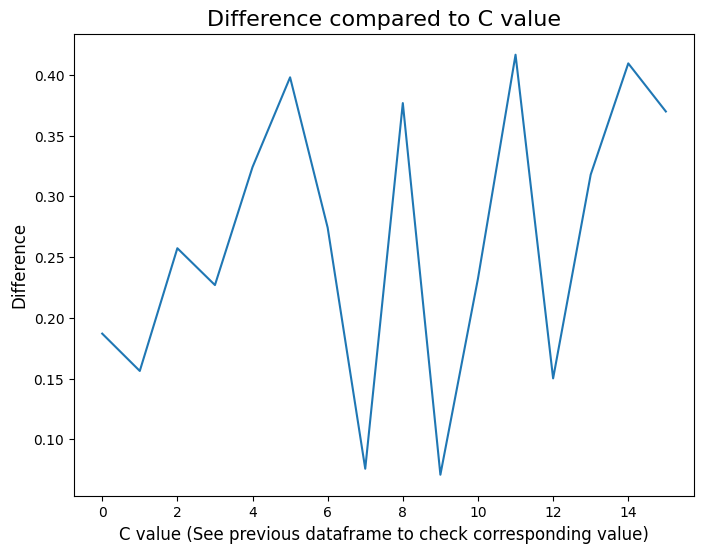

In [38]:
ax = df['Difference'].plot(figsize=(8,6))
ax.set_title('Difference compared to C value', fontsize=16)
ax.set_xlabel('C value (See previous dataframe to check corresponding value)', fontsize=12)
ax.set_ylabel('Difference', fontsize=12)

When we increase C, the difference in the training and testing error can varry, from we can see in the graph, value of C has no particular effect on the difference, it can decrease or increase. It must depends on the data we have and the complexity of the model.

## Assignment 2.2

We go back to the usual iris dataset

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

I like to use pandas dataframe to have a better overview of the situation so i will create an iris pd dataframe :

In [15]:
df = pd.DataFrame(data, columns=data_feature_names)
df['Target'] = target_names[target]
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

$\mathbf{Exercise\, 1.}$ Using bootstrap, compute a 95% confidence interval for the median of the feature $\mbox{sepal length (cm)}$

In [16]:
alpha = 0.05
n_boot_rep = 3000
conf_level = alpha / 2 * n_boot_rep

In [17]:
boot = np.random.choice(df["sepal length (cm)"],
                        size=(len(df),
                        n_boot_rep),
                        replace=True)

boot_median = np.median(boot, axis=0)

low = np.sort(boot_median)[int(conf_level)]
up = np.sort(boot_median)[int(n_boot_rep - conf_level)]

print(
    f"The {100-alpha*100}% confidence interval for the median is : [{low},{up}]")

The 95.0% confidence interval for the median is : [5.6,6.0]


$\mathbf{Exercise\, 2.}$ Compute the null distribution for the hypothesis $H_0$: the mean of $\mbox{'sepal width (cm)'}$ is the same for $\mbox{setosa}$ and $\mbox{virginica}$. 

Filter only setosa and virginica

In [18]:
setosa = df.loc[df["Target"] == "setosa"]["sepal width (cm)"].values
virginica = df.loc[df["Target"] == "virginica"]["sepal width (cm)"].values

In [19]:
print(np.mean(setosa))
print(np.mean(virginica))

3.428
2.974


In [20]:
def boostrap_groups(x,y, B = 1):
    z = np.concatenate([x, y])
    diff_boostrap =np.empty(B)
    for i in range(B):
        permuted_data = np.random.choice(z, len(z), replace = True)
        perm_sample_1 = permuted_data[:len(x)]
        perm_sample_2 = permuted_data[len(x):]
        diff_boostrap[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)
    real_diff = np.mean(x) - np.mean(y)
    print('Mean setosa : ', np.mean(x))
    print('Mean virginica : ', np.mean(y))
    print("The observed difference of mean is :",round(real_diff,3))
    print('statistical test for the difference (p-value): ', np.sum(real_diff>diff_boostrap)/B)
    plt.hist(diff_boostrap, 25, histtype='step')
    plt.title('Null distribution')
    plt.axvline(x = real_diff)
    plt.show()

Mean setosa :  3.428
Mean virginica :  2.974
The observed difference of mean is : 0.454
statistical test for the difference (p-value):  1.0


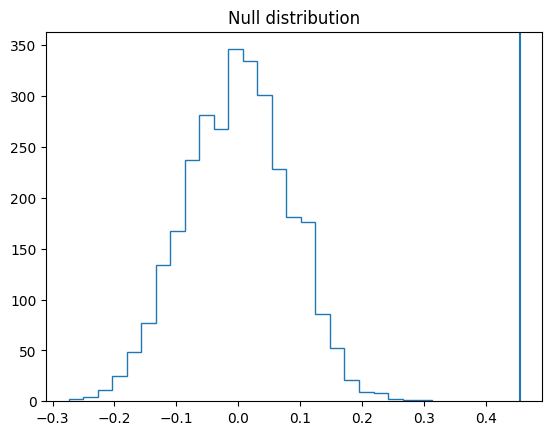

In [21]:
boostrap_groups(setosa,virginica,n_boot_rep)

As we have a p-value=0, we can say the the null hypothesis is rejected and sepal_width for setosa and virginica do not have the same mean

$\mathbf{Exercise\, 3.}$ Compute a 2-sided bootstrapped p-value for the difference between the means of $\mbox{setosa}$ and $\mbox{virginica}$.

In [22]:
#compute observed statistic
def compute_t(x, y):
    # Compute mean
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # Compute var
    sigma2_x = np.var(x)
    sigma2_y = np.var(y)
    return (mean_x - mean_y) / np.sqrt(sigma2_x / len(x) + sigma2_y / len(y))



def center_concat_data(x, y):
    # concatenated data for centering the distributions
    z = np.concatenate([x, y])
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # Translating the data around avg(z)
    x_tilde = x - mean_x + np.mean(z)
    y_tilde = y - mean_y + np.mean(z)

    return x_tilde, y_tilde



def compute_t_boot(x, y, n_reps):
    n = len(x)
    m = len(y)
    x_tilde,y_tilde=center_concat_data(x,y)
    
    # We now concatenate the centered data and sample from it
    z_tilde = np.concatenate([x_tilde, y_tilde])

    # Number of bootstrap samples
    B = n_reps

    # We generate B samples 
    b_sample = np.random.choice(z_tilde, (B, n+m), replace=True)

    # For each pair of bootstrap samples we compute the associated statistic 
    t_bootstrap = []
    for i in range(B):
        x_simulated = b_sample[i,:n]
        y_simulated = b_sample[i,n:]
        t_bootstrap.append(compute_t(x_simulated, y_simulated))

    # Plotting the null hypothesis distribution
    plt.hist(t_bootstrap, 25, histtype='step')
    plt.title('Null distribution')
    plt.axvline(x = t_obs)
    plt.show()

    # Computing the significance of our test
    bootstrap_stat = np.sum(np.abs(t_obs)>np.abs(t_bootstrap))/B
    
    print('The bootstrap significance of the test is: ' + str(bootstrap_stat))
    return(t_bootstrap)

In [23]:
t_obs=compute_t(setosa, virginica)
print("Observed t statistic :",t_obs)

Observed t statistic : 6.515836546140517


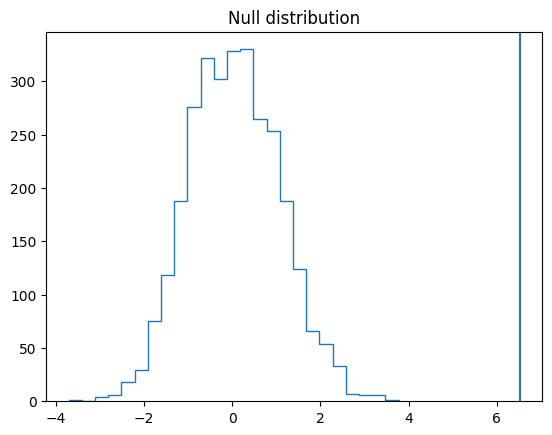

The bootstrap significance of the test is: 1.0


In [24]:
t_bootstrap=compute_t_boot(setosa,virginica,n_boot_rep)

In [25]:
print('95% confidence interval for the null distribution: ',  np.quantile(t_bootstrap, [0.025, 0.975]))
print('observed statistic: ', t_obs)

95% confidence interval for the null distribution:  [-1.83915788  2.09885568]
observed statistic:  6.515836546140517


The observed t value does not lie inside the 95% CI, it means that we can reject the null hypothesis, plus we have the bootstrap significance of the test that is equal to 1, which also means we can reject the null hypothesis.

We can conclude that the mean of the sepal width feature is not the same for setosa and virginica.

$\mathbf{Exercise\, 4.}$ The central limit theorem (Lindeberg-Levy version) states that given a sequence $X_1, X_2, \ldots, X_n $ of independent variables drawn from the same ditribution, $X_i\sim F$, then:

$$ \sqrt{n} \left( \frac{1}{n} \sum X_i - \mu \right) \rightarrow \mathcal{N}(0,\sigma^2),$$

where $\mu = \mathbf{E}[F]$ and $\sigma^2 = Var(F)$.
In particular, the sample mean converges to the normal distribution:

$$ \frac{1}{n} \sum X_i \rightarrow \mathcal{N}(\mu,\frac{\sigma^2}{n}). $$

Let $F = Exponential(2)$ be the exponential distribution with parameter $\lambda = 2$, and let $X_1, X_2, \ldots, X_{20}$ be 20 samples from this distribution. Verify for this case the central limit theorem via bootstrapping. 

__**__ Remember, the mean of the exponential distribution is $\mathbf{E}(F) = 1/\lambda$, while the variance is $Var(F) = 1/\lambda^2$ __**__

Hint:

- Draw n samples (n large) from the Exponential distribution (be careful, when using $\mbox{np.random.exponential}$ the required input scale parameter is $\frac{1}{\lambda}$).
- Compute their average $\frac{\sum X_i}{20}$ and store the result

Constant that will be used : 

In [26]:
LAMBDA = 2
n_samples = 20
n_large = 10000  
std = np.sqrt((1/LAMBDA) ** 2 / n_samples)

Sample from normal distribution

In [27]:
sample_normal=np.random.normal(1/LAMBDA, std, n_large)
sample_normal

array([0.49879016, 0.61488919, 0.63828441, ..., 0.33954413, 0.59128554,
       0.61203721])

Sample from exponential distribution

In [28]:
boot_expo = []
for i in range(n_large):
    boot_expo.append(np.random.exponential(1 / LAMBDA, n_samples))
boot_expo[0]

array([0.0960756 , 0.11845906, 0.17685147, 0.4720457 , 0.06160141,
       0.22850692, 0.26247033, 0.56326922, 0.16733284, 0.05061462,
       0.23239406, 0.54306437, 0.36477097, 0.9734018 , 0.23577059,
       1.07652637, 0.3476048 , 0.43445569, 0.07096798, 1.3682892 ])

Compute means

In [29]:
#Overall mean
mean_boot = np.mean(boot_expo)
#Means of each bootsrap samples
means_boot = np.mean(boot_expo, axis=1) 
print(mean_boot)

0.49961138455428084


Compare mean of both dataset samples : 

In [30]:
differences = [np.abs(means_boot[i] - sample_normal[i]) for i in range(len(means_boot))]
df = pd.DataFrame({"boot":means_boot, "normal_distribution": sample_normal,"difference":differences})
df.head(5)

boot  normal_distribution  difference
0  0.392224             0.498790    0.106567
1  0.475401             0.614889    0.139488
2  0.585973             0.638284    0.052311
3  0.358623             0.308556    0.050066
4  0.641357             0.438940    0.202418

We can see that the difference mean is very low :

In [31]:
np.mean(df["difference"])

0.12502496559880835

We can also see it with a plot :

Here, we can see that both distribution kind of follow a normal distribution

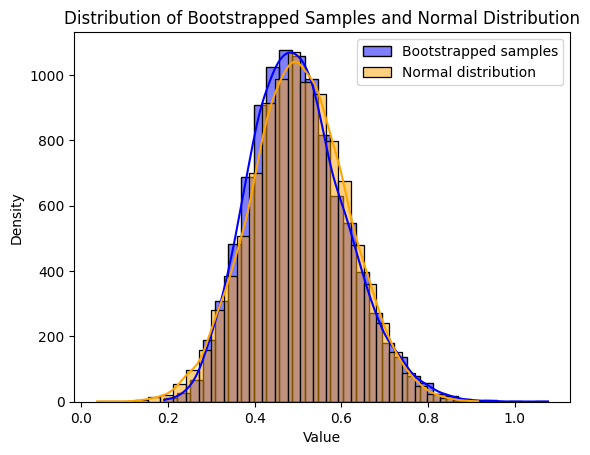

In [32]:
sns.histplot(df['boot'], bins=30, kde=True, color='blue', alpha=0.5, label='Bootstrapped samples')
sns.histplot(df['normal_distribution'], bins=30, kde=True, color='orange', alpha=0.5, label='Normal distribution')
plt.title('Distribution of Bootstrapped Samples and Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

To verify that the n_large as an effect on the distribution, we can try to increase step by step by putting the previous code in a loop :

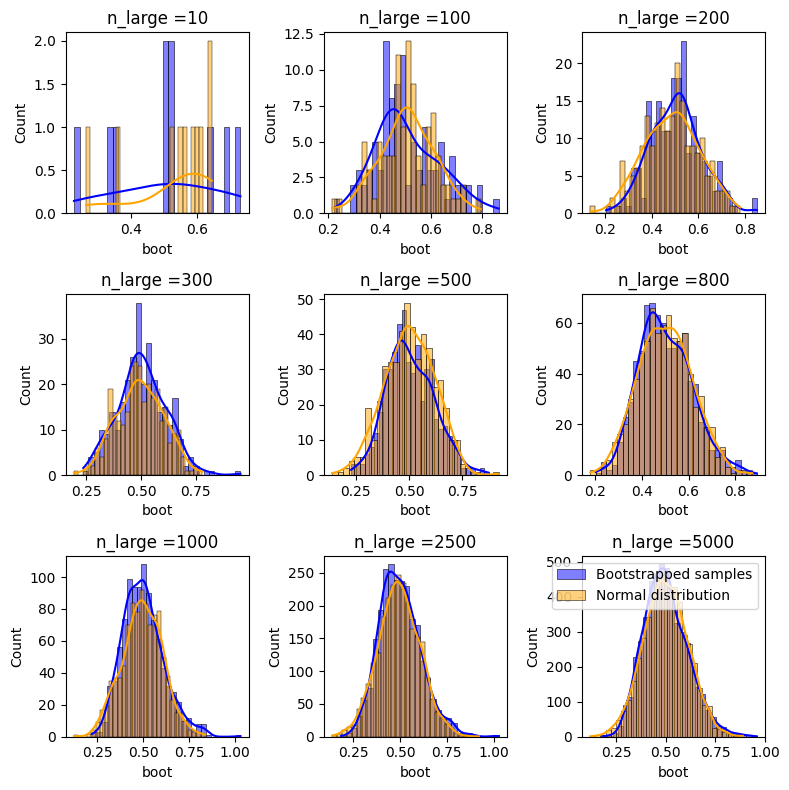

In [33]:
list_n_large=[10,100,200,300,500,800,1000,2500,5000]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()

for i, n_large in enumerate(list_n_large):
    sample_normal = np.random.normal(1/LAMBDA, std, n_large)
    boot_expo = []
    for j in range(n_large):
        boot_expo.append(np.random.exponential(1/LAMBDA, n_samples))
    means_boot = np.mean(boot_expo, axis=1) 
    df = pd.DataFrame({"boot":means_boot, "normal_distribution": sample_normal})
    
    sns.histplot(df['boot'], bins=30, kde=True, color='blue', alpha=0.5, label='Bootstrapped samples', ax=axes[i])
    sns.histplot(df['normal_distribution'], bins=30, kde=True, color='orange', alpha=0.5, label='Normal distribution', ax=axes[i])
    title = f'n_large ={n_large}'
    axes[i].set_title(title)

plt.legend()
plt.tight_layout()
plt.show()

With all the plots, we can see that the n_large variable has an effect on the exponential distribution, and transform it step by step, by increasing in a normal distribution. This can verify the central limit theorem.